In [1]:
import sys
sys.path.append("../")

In [2]:
from pathlib import Path
file = Path("../base") / "irozhlas.jsonb"

In [3]:
from article_utils import create_df

In [4]:
df = create_df(file)
df.Name = "irozhlas"

100%|██████████| 201681/201681 [03:25<00:00, 982.08it/s] 


In [5]:
df.describe()

,article_length,headline_length,brief_length,brief_non_alpha_ratio,num_words,num_words_ratio,num_words_per_line,avg_word_length,non_alpha,non_alpha_ratio
count,201681.000000,201681.000000,201679.000000,201679.000000,201681.000000,201681.000000,201681.000000,201681.000000,201681.000000,201681.000000
mean,1782.154596,72.535727,299.240794,0.005399,305.797115,0.169936,39.788236,5.031193,55.950089,0.030156
std,1443.716445,20.606724,86.890287,0.009208,255.113548,0.016206,14.911433,0.452047,65.286598,0.018979
min,14.000000,4.000000,9.000000,0.000000,2.000000,0.100000,1.763158,1.774194,0.000000,0.000000
25%,903.000000,57.000000,236.000000,0.002618,150.000000,0.160433,31.333333,4.777778,23.000000,0.022768
50%,1509.000000,74.000000,293.000000,0.004032,258.000000,0.167625,37.333333,5.059155,42.000000,0.026754
75%,2239.000000,91.000000,359.000000,0.006369,385.000000,0.176357,45.000000,5.316364,66.000000,0.031220
max,102807.000000,135.000000,1374.000000,1.060000,14815.000000,0.457227,671.000000,9.500000,1742.000000,0.392330


In [6]:
# cut 1990 article
df_date = df.sort_values("date")
for i in df_date[0:4]["url"]:
    print(i)

df_date_asc = df.sort_values("date", ascending=False)
print("asc")
for i in df_date_asc[0:4]["url"]:
    print(i)

df = df[df["date"] > df_date["date"].iloc[0]]
df.Name = "irozhlas"

https://www.irozhlas.cz/zpravy-svet/gunter-schabowski-jak-padla-berlinska-zed-diky-zmatku-_198911091853_mpanuska
https://www.irozhlas.cz/zpravy-domov/dulezitejsi-nez-volebni-zakon-je-mysleni-politiku-_200007080000_rkubicko
https://www.irozhlas.cz/zpravy-domov/filmu-az-oci-prechazeji-_200007250000_dcastkova
https://www.irozhlas.cz/ekonomika/krachy-bank-nekteri-jsou-si-rovnejsi-_200008190000_jrosenauer
asc
https://www.irozhlas.cz/zpravy-domov/ncoz-vrchni-statni-zastupitelstvi-praha-cesti-dobrovolnici-ukrajina-valka-kyjev_2206250500_pik
https://www.irozhlas.cz/sport/tenis/tenis-lukas-rosol-wimbledon-zdenek-kolar-kvalifikace_2206231529_apr
https://www.irozhlas.cz/zpravy-domov/vlada-energeticka-krize-petr-fiala-projev_2206222109_hav
https://www.irozhlas.cz/zpravy-domov/podcast-vinohradska-12cena_2206161843_cen


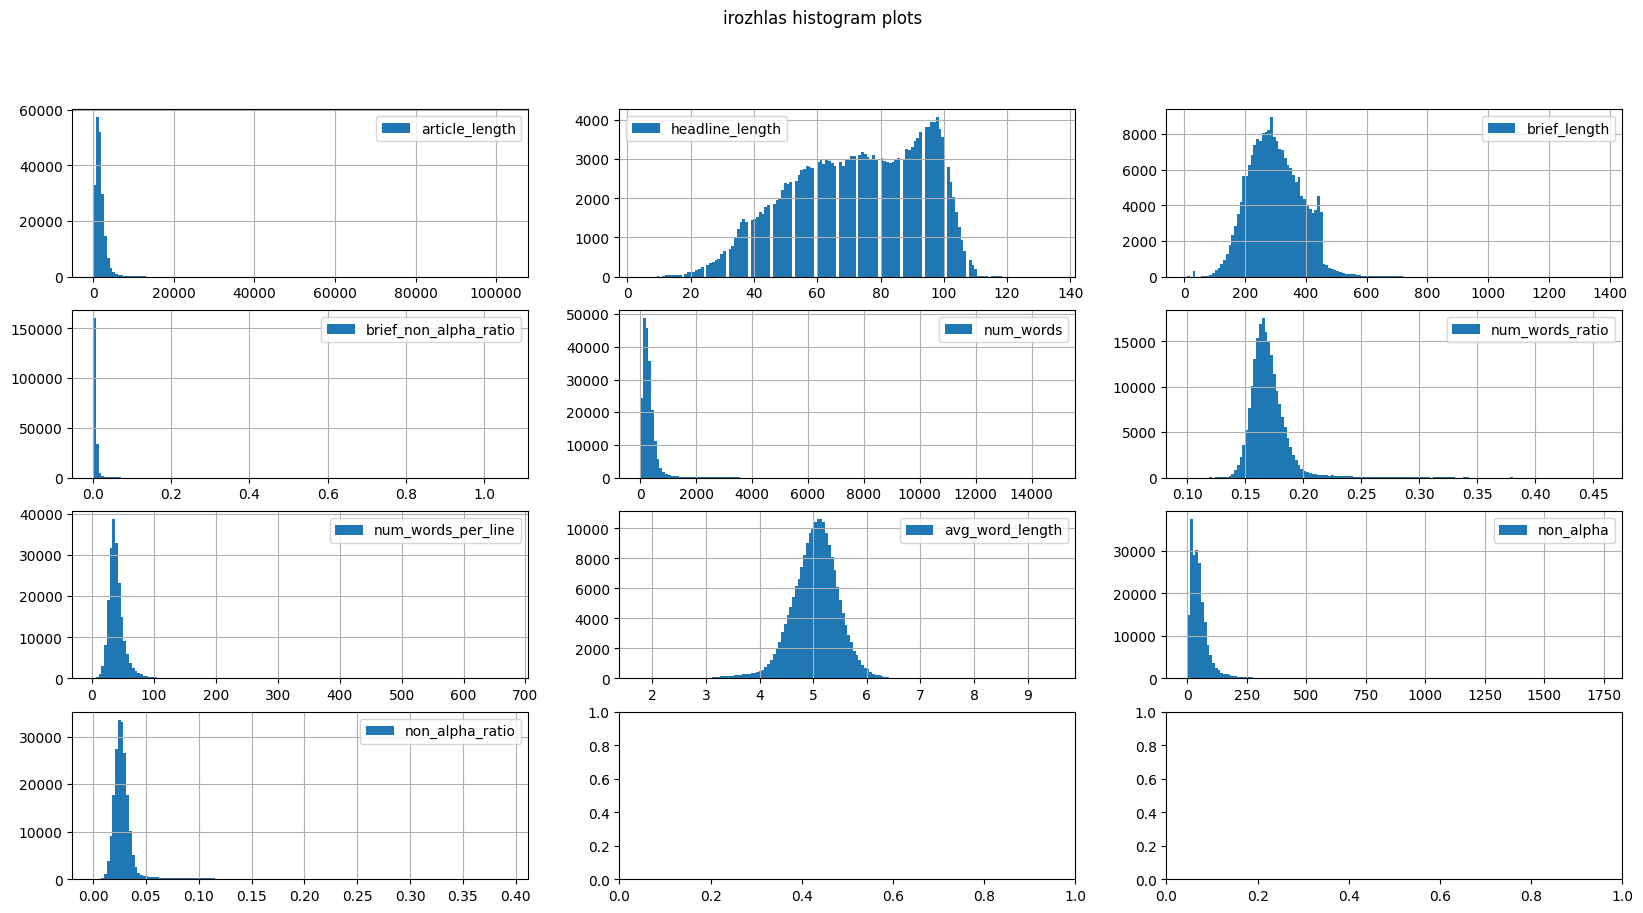

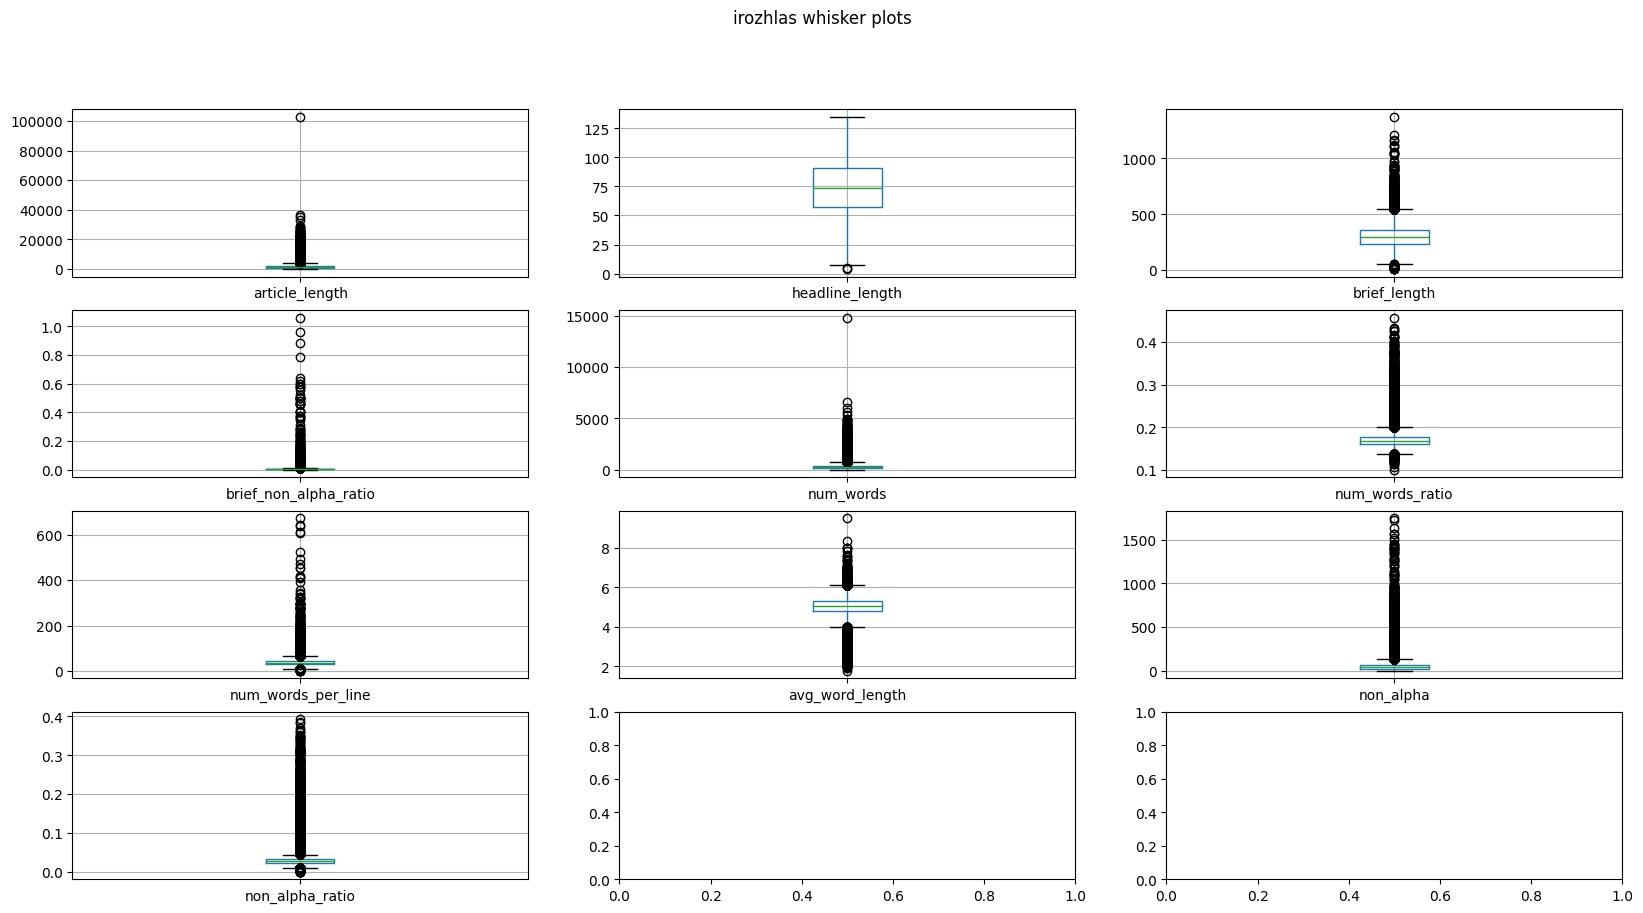

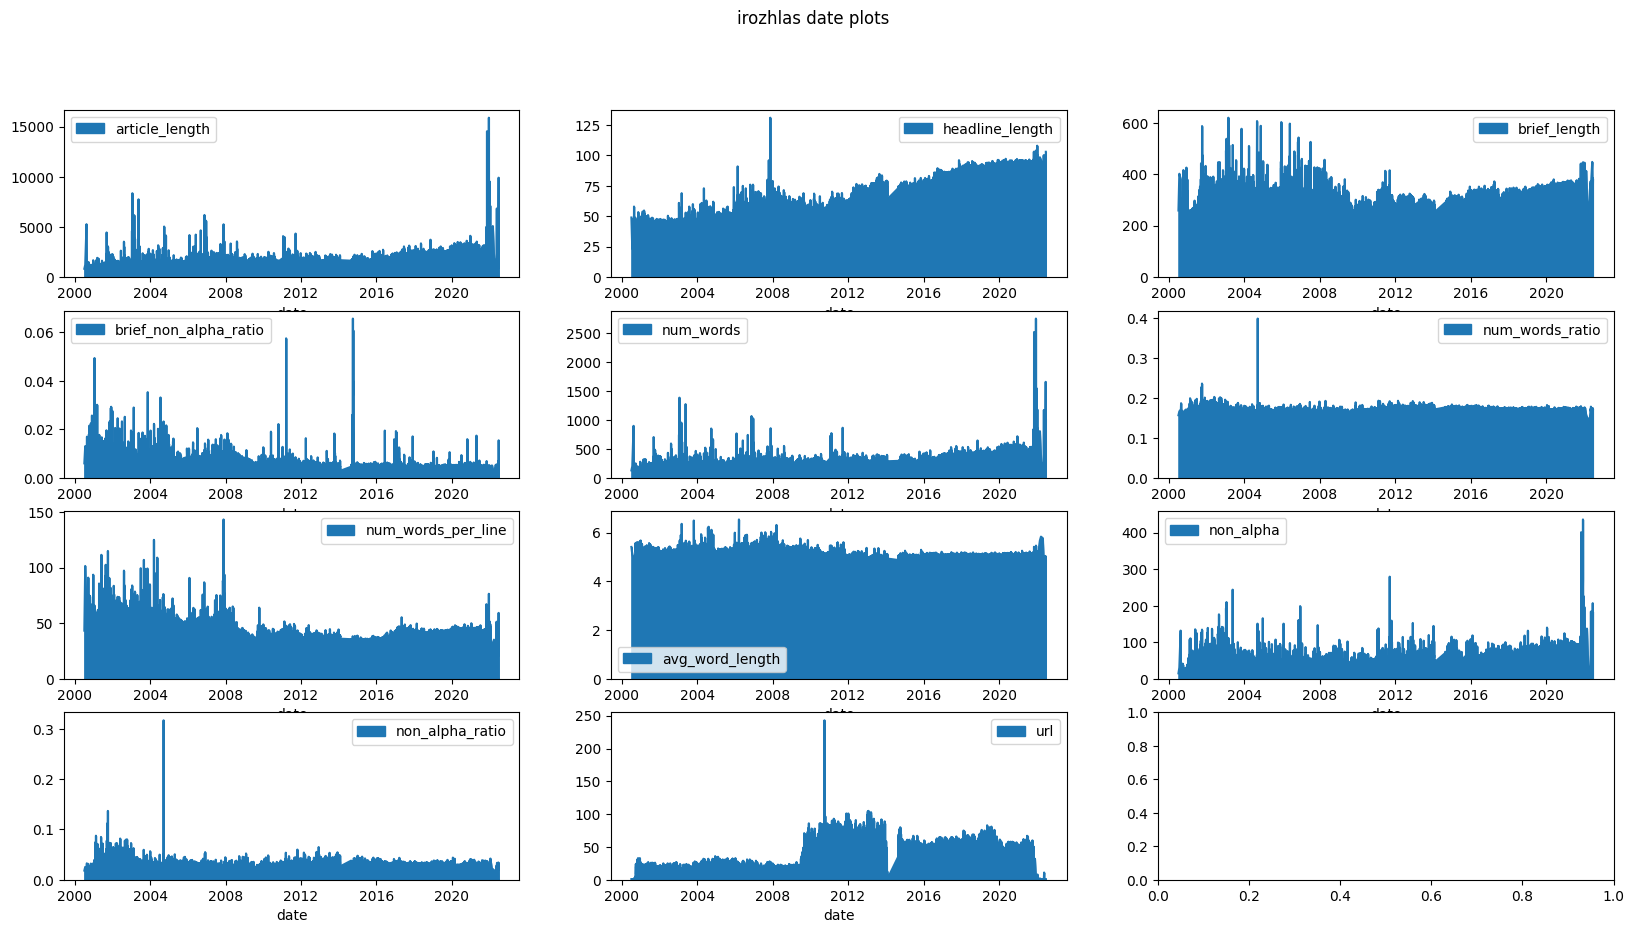

In [7]:
from article_utils import create_exploratory_plots
create_exploratory_plots(df)

In [8]:

from preprocess_utils import show_outlier_by_percentiles, show_df_lines, show_outliers, pick_indexes
col = "headline_length"
# IROZHLAS INSPECTION
mod = lambda x: x["headline"]

df_tmp = show_outlier_by_percentiles(df, col, 0.99, limit=20)
show_df_lines(df_tmp, file, mod)
# Okayage

  2%|▏         | 3408/201681 [00:00<00:11, 17206.30it/s]

Polská premiérka se opřela do Evropské komise. 'Došlo k překroucení demokratických zásad,' řekla ve Varšavě


 50%|████▉     | 99886/201681 [00:04<00:04, 21595.41it/s]

Místo kol omezení předzahrádek. Nastupující starosta Prahy 1 Čižinský chce vyjít vstříc chodcům i cyklistům
Je to na něm a jeho svědomí, říká ministr Petříček o šanci, že se poslanec Volný omluví za výroky o Havlovi
‚Přišel jsem o nohy zbytečně? Vypadá to tak.‘ Váleční veterání se ptají, zda měly boje v Afghánistánu smysl
Boj s časem i počasím: k thajské jeskyni se blíží další deště. Hrozí, že zaplaví úkryt 12 malých fotbalistů
Dva krásné góly, červené karty, zraněný Kolář. Slavia zvládla ostrou bitvu s Rangers a je ve čtvrtfinále EL
Oxfordská vakcína proti koronaviru vyvolává silnou imunitní reakci u seniorů. Výsledky testů jsou pozitivní
Uneseného vietnamského politika dopravili do vlasti slovenským vládním speciálem, nepochybují vyšetřovatelé
Čtvrté vítězství pro tým Mitchelton-Scott na Tour de France zajistil Trentin. Kreuziger si o místo pohoršil
Hackeři v Singapuru ukradli data 1,5 milionu lidí. Cílili na zdravotní záznamy premiéra, tvrdí ministerstvo
POVODNĚ ONLINE - DEN PÁTÝ: P

 53%|█████▎    | 106590/201681 [00:05<00:04, 21517.01it/s]

Doběhl jako třetí, ale slaví zlato. Pavel Maslák po diskvalifikaci soupeřů triumfoval na HMS potřetí v řadě
Francouz v NHL nastoupil poprvé od začátku a dovedl Colorado k vítězství. Pastrňák bodoval potřetí za sebou
Křetínský koupil více než pět procent akcií ve francouzské televizi TF1. Svůj podíl se chystá dále zvyšovat
Tichý střelec se uvaří ve vlastní hlavě, do poslední chvíle není poznat, že vytáhne zbraň, říká psycholožka
Jak vznikají v Rusku špionážní kauzy? ‚Udají i vlastní lidi, aby jela linka dál,‘ popisuje vězněný Safronov
Hvězdou zlínského festivalu bude syn legendárního Ennia Morriconeho. Přijede i herec ze seriálu Hra o trůny


100%|██████████| 201681/201681 [00:09<00:00, 20881.09it/s]

Výběr z médií: vliv vysokoškolských titulů při hledání práce, vlak mezi Znojmem a Vídní i rostoucí ceny aut


In [9]:

df_tmp = show_outliers(df, col, 18, "lower", limit=10, random=False)
show_df_lines(df_tmp, file, mod)

# Shows that we shouldn have split by -

 15%|█▍        | 29783/201681 [00:01<00:06, 26906.15it/s]

Zemřel Jiří Hubač


 36%|███▌      | 72186/201681 [00:02<00:05, 24971.35it/s]

Výstavy roku 2010


 47%|████▋     | 93800/201681 [00:03<00:04, 26632.48it/s]

Drive-in pandemie
Počasí se ochladí
Stanislav Juránek


 50%|█████     | 101759/201681 [00:03<00:03, 26123.73it/s]

Etna se zklidňuje


 54%|█████▍    | 109425/201681 [00:04<00:03, 24647.82it/s]

První den v Ósace


 66%|██████▌   | 132660/201681 [00:05<00:02, 24495.09it/s]

Omyl, nebo záměr?
Tipsport cup 2003


 91%|█████████ | 182530/201681 [00:07<00:00, 24863.18it/s]

Konec éry levice?


100%|██████████| 201681/201681 [00:07<00:00, 25671.59it/s]


In [10]:

df_tmp = df.groupby(col).count()
mins = df_tmp[df_tmp["url"] < 500]
# No idea why there are holes in plot they are not in column :/
df_tmp[55:65]



,url,article_length,brief_length,brief_non_alpha_ratio,num_words,num_words_ratio,num_words_per_line,avg_word_length,non_alpha,non_alpha_ratio,date
headline_length,,,,,,,,,,,
60,2922,2922,2922,2922,2922,2922,2922,2922,2922,2922,2922
61,2981,2981,2981,2981,2981,2981,2981,2981,2981,2981,2981
62,2883,2883,2883,2883,2883,2883,2883,2883,2883,2883,2883
63,2970,2970,2970,2970,2970,2970,2970,2970,2970,2970,2970
64,2962,2962,2962,2962,2962,2962,2962,2962,2962,2962,2962
65,2899,2899,2899,2899,2899,2899,2899,2899,2899,2899,2899
66,2829,2829,2829,2829,2829,2829,2829,2829,2829,2829,2829
67,2929,2929,2929,2929,2929,2929,2929,2929,2929,2929,2929
68,2831,2831,2831,2831,2831,2831,2831,2831,2831,2831,2831


In [11]:
df_tmp = df.sort_values(col, ascending=False)
show_df_lines(df_tmp[0:1], file, mod)

 90%|█████████ | 181968/201681 [00:07<00:00, 26142.30it/s]

'Nevzpomínám si, že bychom s Rathem byli kamarádi,' říká Zeman. Za nominací Srpa si stojí, StB by podle něj nezavírala vlastního agenta


100%|██████████| 201681/201681 [00:07<00:00, 25420.34it/s]


  3%|▎         | 5928/201681 [00:00<00:09, 20474.90it/s]

Exšéf fotbalu Pelta k soukromým letům: Bral jsem to jako ulehčení a nutný servis na úrovni prezidenta asociace


  8%|▊         | 15261/201681 [00:00<00:08, 22838.73it/s]

Po jednom zápase v sezoně reprezentační debut. ‚Má před sebou velkou budoucnost,‘ chválil Staňka trenér Belgie
Ve Francii strmě rostou počty nakažených. ‚Takto silný a náhlý nárůst jsme ještě nezažili,‘ uvedl mluvčí vlády


 20%|██        | 41261/201681 [00:01<00:06, 23010.07it/s]

Černošice uložily Babišovi kvůli střetu zájmů pokutu 250 tisíc korun. ‚Jde o nadále trvající přestupek,‘ tvrdí
Prestiž českého MMA se zvyšuje. ‚Kvalitní bojovníci tu byli vždycky, je to o příležitosti,‘ shodují se experti


 23%|██▎       | 45827/201681 [00:02<00:06, 22531.59it/s]

10 let od začátku války zůstává situace v Sýrii zoufalá. ‚Bez pomoci by dnes řada lidí nepřežila,‘ říká expert


 35%|███▍      | 70054/201681 [00:03<00:05, 23859.24it/s]

S ukrytou pistolí jednal s Tálibánci, aby zachránil lidi. ‚Neustále se střílelo,‘ říká kapitán ochranného týmu


 38%|███▊      | 77147/201681 [00:03<00:05, 23001.97it/s]

‚Cokoliv jiného než postup by byl neúspěch.‘ Hradečtí fotbalisté si splnili cíl a vrací se do nejvyšší soutěže


 46%|████▋     | 93673/201681 [00:04<00:04, 22825.80it/s]

Češi v zahraničí zatím v rámci sčítání lidu vyplnili 24 tisíc formulářů. Za hranicemi jich žije přes 200 tisíc


 50%|████▉     | 100525/201681 [00:04<00:04, 22681.66it/s]

Prvomájových protestů na Střeleckém ostrově a Letné se zúčastnilo pár stovek lidí. Zahajoval je poslanec Volný
Stvrdil popravu tisíců lidí, 30 let poté má být íránským prezidentem. Raísí utáhne šrouby, obrat ale nepřinese


 53%|█████▎    | 107672/201681 [00:04<00:04, 22933.76it/s]

Aktivita klíšťat je na nejvyšším stupni. ,Co nejrychleji ho odstraňte, na technice nezáleží,‘ radí parazitolog


 58%|█████▊    | 117445/201681 [00:05<00:03, 24017.97it/s]

Chtěl před policejní hlídkou skrýt, že nesmí za volant. Prokázal se jim cizími doklady se čtyřmi zákazy řízení


 78%|███████▊  | 157906/201681 [00:06<00:01, 23167.26it/s]

Zdravotníci vyzývají Brity, aby tleskali za jejich platy. Vláda slibuje přidat jedno, oni chtějí 12,5 procenta
Kulhánka doprovází v Egyptě podnikatelská mise. ‚Není to tu jen odbytiště pro kolejnice,‘ říká obchodní radová
Statistický úřad: Nejlevněji šlo byty pořídit v okresech zasažených těžbou uhlí, nejdražší byly v Praze a Brně


 90%|█████████ | 182099/201681 [00:07<00:00, 24711.93it/s]

Policejní program za miliony je děravý, může znehodnotit důkazy. Kriminalisté spoléhají na ‚vizuální kontrolu‘


 94%|█████████▍| 189621/201681 [00:08<00:00, 24582.60it/s]

Policisté u Bendovy oslavy nepochybili, zjistila vnitřní kontrola. Šéf policie je přesvědčen, že o ní nevěděli
‚Nesmí se to nikdo dozvědět.‘ Predátor z filmu V síti obtěžoval další dívky, stíhán je i za šíření pornografie


 96%|█████████▋| 194514/201681 [00:08<00:00, 24224.49it/s]

Uvnitř historického paláce v Jeruzalémě se skrývala 2700 let stará toaleta. Dovolit si ji mohli jen nejbohatší


100%|██████████| 201681/201681 [00:08<00:00, 23230.82it/s]


,article_length,headline_length,brief_length,brief_non_alpha_ratio,num_words,num_words_ratio,num_words_per_line,avg_word_length,non_alpha,non_alpha_ratio
count,13306.000000,13306.000000,13306.000000,13306.000000,13306.000000,13306.000000,13306.000000,13306.000000,13306.000000,13306.000000
mean,2489.299489,92.474147,348.278897,0.004492,424.069142,0.169476,40.492565,5.031923,74.952352,0.029736
std,1929.923145,12.347151,74.332283,0.007567,336.064006,0.012902,11.261014,0.387221,70.957958,0.013371
min,14.000000,13.000000,99.000000,0.000217,2.000000,0.128107,1.763158,2.688121,0.000000,0.000000
25%,1435.000000,89.000000,294.000000,0.002462,240.000000,0.161085,33.500000,4.793677,38.000000,0.023605
50%,2082.500000,95.000000,357.000000,0.003661,353.000000,0.167604,38.545455,5.059827,57.000000,0.027247
75%,2896.750000,100.000000,413.000000,0.005481,492.000000,0.175858,45.000000,5.292193,85.000000,0.031388
max,27031.000000,110.000000,486.000000,0.785714,4496.000000,0.313176,166.130435,6.820896,1513.000000,0.224567


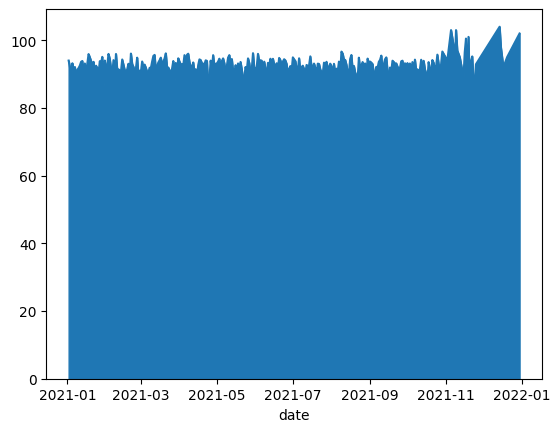

In [12]:

from datetime import datetime
df_tmp = df
df_tmp = df_tmp[(df_tmp["date"] > datetime(2021, 1, 1).date()) & (df_tmp["date"] < datetime(2022, 1, 1).date())]
df_tmp.groupby("date")[col].mean().plot.area()

lines = df_tmp[df_tmp[col] == 110].sample(20)
show_df_lines(lines, file, mod)
df_tmp.describe()

array([[<AxesSubplot:title={'center':'article_length'}>]], dtype=object)

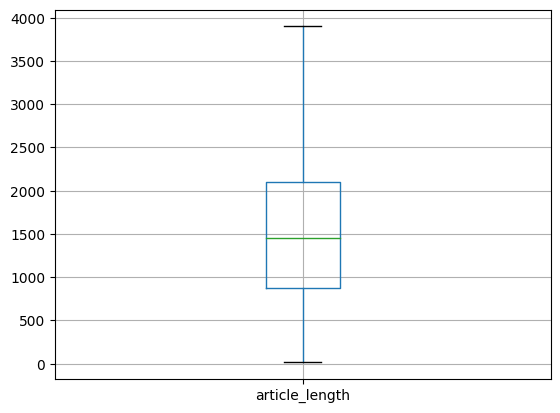

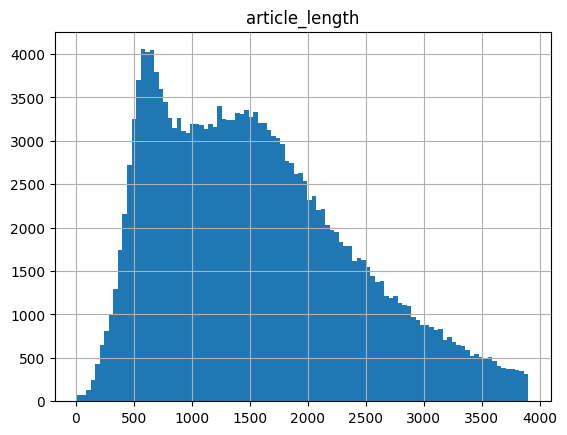

In [13]:

import numpy as np
# ARTICLE LENGTH
#show_df_lines(df_art, file, mod)
col = "article_length"
# Long articles -> podcast transcript
df_art = df[df[col] < np.quantile(df[col], 0.95)]
df_art.boxplot(column=col)
df_art.hist(column=col, bins=100)


In [14]:
df_art = show_outlier_by_percentiles(df,col, 0.9999, limit=5)

mod = lambda art : art["content"] + "\n---------------\n"
show_df_lines(df_art, file, mod)

  4%|▍         | 8117/201681 [00:00<00:07, 27183.59it/s]

Přenesme se nejprve o několik měsíců zpět. Je říjen, jsme v Banja Luce, hlavním městě bosenské Republiky srbské. Právě jejich zástupci před 15 lety s mimořádným sebezapřením, krajní nedůvěrou k mezinárodnímu společenství a velkými obavami o osud svého národa i svůj vlastní vyslovili souhlas s mírovou dohodou. Dnes je situace přesně opačná - bosenští Srbové úzkostlivě hlídají každé  písmeno v textu dohody, která jim v podstatě dala samostatný stát v  rámci Bosny. Proto se také tomuto státu dnes říká Daytonská Bosna.
Signatáři a garanty mírové dohody byli prezidenti Srbska - Slobodan Milošević, Bosny - Alija Izetbegović a Chorvatska - Franjo Tudjman. Žádný z nich už své pohnutky na tomto světě nevysvětlí - všichni tři už zemřeli a tento týden se k nim přidal i americký vyjednavač Richard Holbrook, diplomat  který o pozadí mírové dohody věděl asi nejvíc ze všech.
Rozhovor s bývalým bosenským a jugoslávským prezidentem
Důležitější než minulost, je ale současnost a budoucnost zvláštního bos

 44%|████▍     | 89174/201681 [00:03<00:04, 24409.94it/s]

Premiér Andrej Babiš v reakci odmítl, že by dával pokyny napřímo, prý se jen zajímal o činnost státní organizace. Kremlíka Babiš z vlády odvolal kvůli údajně předražené zakázce na informační systém pro dálniční známky. Krátce na to vyšlo najevo podezření, že před Vánoci ministrovi jeho známý advokát nabídl úplatek 1,5 milionu korun. Kvůli tomu se Kremlík obrátil na BIS.
„Pan premiér je v dobrém slova smyslu predátor, který chce mít nad vším kontrolu a všechno chce řídit. Víc bych za tím nehledal, než že prostě cítil potřebu napřímo vydávat pokyny,“ popisuje Kremlík soužití ve vládě s Babišem ve velkém rozhovoru.
Jaké byly aktuálně vaše vztahy s premiérem Andrejem Babišem? Na facebook jste napsal, že jste spolu měli „velmi otevřené výměny názorů“. A také jste napsal, že se to týkalo Českých drah. Kvůli čemu? Je pravda, že při nástupu na ministerstvo dopravy vám premiér řekl, že budete řídit všechno kromě Českých drah? Situace byla taková, že já jsem si prosadil na předsedu dozorčí rady 

 62%|██████▏   | 125737/201681 [00:04<00:02, 25588.19it/s]

Jaký myslíte, že skutečně bude nový rok?Vždycky na začátku roku si říkám takovou větu, která pochází od Douga Hammerschmidta: Za to, co bylo, děkuji. K tomu, co přijde – v téhle době je samozřejmě těžké něco předvídat, protože jen málokdy byl svět tak propojený, nejen geograficky, ale i další oblasti jsou tak propojené, že mohou přijít neočekávané věci.
Obávám se ale, že to bude rok velkých krizí. K tomu ale dodávám, že krize je vždycky šance. Nejsem finanční analytik ani ekonom, ale přece jen čtu ekonomické rozbory v seriózních světových časopisech a ty předpovídají, že pravděpodobně přijde finanční krize. Ta samozřejmě může mít velký politický dopad. Všude jsou totiž populistické strany, které se jistě rády chopí všech krizových momentů.
Dále jsou dvě velké mocnosti Západu v politické krizi. Asi se nezabrání brexitu a ten vrhá Velkou Británii do izolace, která bude mít pro místní společnost neblahé důsledky. Může se stát, že z Velké Británie bude zakrátko malá Británie.
A Spojené stá

 75%|███████▌  | 151283/201681 [00:05<00:02, 24620.11it/s]

Podle toho, co zatím o tomto případu víme: je to relevantní vyšetřování, jak tvrdí demokrati, anebo divadlo a politická hra demokratů, jak to nazývají republikáni?Je to vážné, takže bych v tomhle souhlasila s demokraty, pokud to stavíte takhle. Existuje významné množství důkazů, které naznačují, že prezident Spojených států zneužil svou funkci. Že využil moc, kterou mu tento úřad dává, ke svému vlastnímu osobnímu a politickému prospěchu, a ne k prospěchu Američanů, což je jádrem celého vyšetřování.
Ale jedna věc je nevhodné chování, jak o tom někteří mluví, a jiná věc jsou přímé důkazy o provinění, které si zaslouží impeachment. Vaším nepolitickým pohledem odbornice na americké právo – opravdu sledujeme případ, kde je ústavní obžaloba prezidenta na místě?Republikáni zastávají pozici, že se zatím neobjevil svědek, který by řekl, že prezident skutečně nařídil, aby se Ukrajina zavázala k vyšetřování pana Bidena. A že absence takového přímého důkazu je problém. Ale americké soudy nevyžaduj

 82%|████████▏ | 166083/201681 [00:06<00:01, 21538.05it/s]

Jaká je vaše nejsilnější vzpomínka na podzim 1989? Asi pocit, že historie se v jiných zemích pohybuje různě rychle. Byl jsem předtím v Polsku, zemi, kterou jsem znal velmi dobře. Několik dní jsem strávil ve Varšavě a psal o volbách a vyjednáváních kolem kulatého stolu. Když jsem Polsko v létě 1989 opouštěl, odjížděl jsem prakticky ze svobodné země. Při návratu do Prahy jsem cítil, že se vracím do nesvobody. Ten rozdíl byl něco nepředstavitelného.
Od roku 1948 existovala prakticky všude za želenou oponou stejná omezení. To byl svět, jak jsem ho znal a v jakém jsem vyrostl. A počínaje létem 1989 jste měli v Praze polské a maďarské diplomaty, kteří byli ochotni s vámi mluvit a chovali se jako normální lidé, zatímco českoslovenští nebo východoněmečtí představitelé se pořád chovali jako komunističtí byrokrati.
To, co kdysi bývala jedna homogenní východoevropská realita, se rozpadlo do mnoha různých linií a změna byla nevyhnutelná. To je velmi silná vzpomínka.
Kdy jste začal opravdu věřit to

100%|██████████| 201681/201681 [00:08<00:00, 24859.02it/s]


In [15]:
from preprocess_utils import show_outliers
df_art = show_outliers(df,col, 300, "lower", limit=20, random=False)
show_df_lines(df_art, file, lambda x: x["url"] + ":\n" + x["content"] + "\n---------------\n ")

  6%|▋         | 13072/201681 [00:00<00:07, 25093.38it/s]

https://www.irozhlas.cz/zpravy-domov/kauza-vladimira-hucina-opet-pred-snemovni-komisi_200105152058_mkopp:
Podle předsedy komise Jana Klase z ODS do případu nevnesl jasno ani ministr spravedlnosti Jaroslav Bureš. Ani on totiž nemůže komisi předkládat jí požadované informace. Ministr ale podle Klase udělal velmi vstřícný krok. Požádá nejvyšší státní zástupkyni o odpovědi na otázky, které komisi zajímají.
---------------
 


 18%|█▊        | 35298/201681 [00:01<00:06, 23936.09it/s]

https://www.irozhlas.cz/zpravy-domov/srejber-zatim-zustava-ve-vazbe-_200101121540_mkral:
Žalobce František Fíla se obával toho, že by Šrejber mohl utéct do zahraničí, navíc měl výhrady k výši kauce. Podle Šrejberova obhájce Stanislava Balíka se dá jen těžko odhadnout, kdy vrchní soud v případě Šrejbrovy vazby rozhodne, a to ačkoli jeho klient splnil všechny podmínky pro své propuštění.
---------------
 


 25%|██▌       | 50471/201681 [00:02<00:06, 25159.85it/s]

https://www.irozhlas.cz/zpravy-domov/patrani-senior-okrouhlice-havlickuv-brod-policie_2105021528_kro:
Pohřešovaný odešel z domova ve čtvrtek a od té doby o sobě nepodal zprávu. Neměl u sebe ani mobilní telefon. Muž byl zvyklý chodit na pravidelné procházky do nejbližšího okolí svého bydliště.
„S ohledem na jeho rodinu a blízké nebudeme k případu poskytovat žádné další podrobnosti,“ uvedla Čírtková.
---------------
 
https://www.irozhlas.cz/zpravy-svet/tragicke-prvenstvi-utoku-v-las-vegas-nejvyssi-pocet-obeti-strelby-v-historii-usa_1710021345_dbr:
Střelec, který v noci na pondělí útočil v Las Vegas a kterého následně policie zneškodnila, má na svědomí minimálně 50 obětí a přes 400 zraněných. Útok se tak co do počtu obětí zařadil před doposud nejhorší útok, ke kterému došlo loni v červnu v gay klubu v Orlandu na Floridě.
Střelba na území USA:
---------------
 
https://www.irozhlas.cz/ekonomika/zkrat-oddalil-prifazovani-druheho-bloku-temelina_200207061112_mkopp:
Jak řekla Radiožurnálu mlu

 29%|██▉       | 58097/201681 [00:02<00:05, 25181.68it/s]

https://www.irozhlas.cz/sport/volejbalistky-znaji-los-me_200107011129_mkaclova:
Los ve Varně, kde Češky odehrají celou svojí skupinu, jim byl poměrně nakloněn. Rusko je sice jasným favoritem celého šampionátu, ale s Bulharskem by měly české hráčky svést bitvu o druhé postupové místo do semifinále. Druhou skupinu tvoří Itálie, Chorvatsko, Německo, Nizozemsko, Polsko a Ukrajina.
---------------
 


 46%|████▌     | 92024/201681 [00:03<00:04, 25010.94it/s]

https://www.irozhlas.cz/zpravy-domov/sest-mrtvych-po-nehode-na-lounsku_200110262138_mkaclova:
Jak  Českému rozhlasu řekl operační důstojník žateckých hasičů Josef Toksa, čelně se tam srazily  plně obsazené osobní automobily Fiat Punto a Volkswagen Passat. Dvě z obětí jsou děti. Těžce zraněná řidička  Fiatu  byla v bezvědomí  převezena rychlou záhrannou službou do nemocnice v Ústí nad Labem.
---------------
 
https://www.irozhlas.cz/sport/karlovarsti-podlehli-v-extraligovem-derby-plzni-1-3_200302152139_sport:
Karlovy Vary - Plzeň 1:3 (0:1, 1:1, 0:1)           Branky a nahrávky: 23. Skuhravý (Kraus, Topoli) - 14. Koreis (Řezníček), 30. Andrašovský (Výborný), 60. Řezníček (Andrašovský, J. Straka). Rozhodčí: Souček - Bádal, Šátava. Vyloučení: 5:6, navíc Skuhravý (K. Vary) 10 min. Bez využití. Diváci: 3400.
---------------
 


 57%|█████▋    | 115480/201681 [00:04<00:03, 26064.73it/s]

https://www.irozhlas.cz/zpravy-svet/eu-pomuze-armenii-gruzii-a-tadzikistanu-_200011300000_mkopp:
Největší částka - tři milióny eur - směřuje do Tádžikistánu, adresáti v Arménii obdrží 600.000 eur, pro Gruzii je určeno 400.000 eur.         Vzhledem k tomu, že Evropská unie letos poskytla těmto zemím už několik obdobných pomocí, celková hodnota humanitární pomoci dosáhla částky 18,1 miliónu eur.
---------------
 


 69%|██████▉   | 138951/201681 [00:05<00:02, 26013.44it/s]

https://www.irozhlas.cz/zpravy-svet/izraelske-tanky-ostrelovaly-zapadni-breh-jordanu_200107270737_mkopp:
Informuje o tom agentura AFP s odvoláním na očité svědky. Nejméně devět dělostřeleckých granátů zasáhlo stanoviště severně od Ramalláhu, na kterém působí příslušníci Síly 17, osobní gardy šéfa palestinské samosprávy Jásira Arafata.  Podle prvních informací si izraelské ostřelování nevyžádalo oběti.
---------------
 


 74%|███████▍  | 149748/201681 [00:05<00:02, 25736.04it/s]

https://www.irozhlas.cz/zpravy-domov/predpoved-pocasi-na-utery-17-kvetna_200505171016_mkopp:
Na naše území proudí vlhký vzduch od jihozápadu.
Bude oblačno až zataženo, místy přeháňky. Nejvyšší teploty 15 až 19,    v 1000 m na horách kolem 10 °C.  Slabý proměnlivý vítr 5 až 15 km/h.
Tlak slabě stoupne.  Erupční  aktivita Slunce je střední, pulzační  aktivita geomagnetického pole je střední.
---------------
 


 77%|███████▋  | 154902/201681 [00:06<00:01, 25419.51it/s]

https://www.irozhlas.cz/zpravy-domov/tretina-ostravskych-zlodeju-aut-je-zavislych_200304271351_mkaclova:
"Nicméně o skutečném číslu, podílu závislých lidí na páchání této kriminality se můžeme jenom domnívat. Tam nemůžeme disponovat žádným relevantním údajem. Víc než jedna třetina lidí, kteří páchají trestnou činnost vloupání do motorových vozidel, jsou závislí lidé, kteří užívají psychotropní látky."
---------------
 
https://www.irozhlas.cz/zpravy-domov/sef-ceske-televize-zustava-ve-funkci_200210091635_mkopp:
Podobně to cítí i Milan Knížák, který velmi černou hodnotící zprávu na Balvína připravil. Podle Knížáka prý rada čelí různým tlakům zevnitř televize a Poslanecké sněmovny.
Knížák tvrdí, že na Balvínovo místo je jí vnucován bývalý šéf tohoto média, nynější kancléř prezidenta Václava Havla Ivo Mathé.
---------------
 
https://www.irozhlas.cz/regiony/v-hornim-jiretine-zacali-pribyvat-nove-prihlaseni-volici_201010151434_lrafaelova:
V Horním Jiřetíně a Černicích na Mostecku se očekáv

 81%|████████  | 163035/201681 [00:06<00:01, 26479.16it/s]

https://www.irozhlas.cz/zpravy-domov/byvaly-starosta-prahy-5-jancik-byl-obvinen-protikorupcni-policii-jiz-potreti_201203231626_jpiroch:
Žalobci v minulosti dvakrát stíhání Jančíka zrušili a věc vrátili policii k došetření. Bývalý starosta Prahy 5 už dříve řekl, že obvinění považuje za absurdní. Tvrdil, že k postoupení pohledávek nepotřeboval souhlas zastupitelstva, protože výše jednotlivých pohledávek nepřevyšovala 100 tisíc korun.
---------------
 
https://www.irozhlas.cz/ekonomika/koruna-znovu-stoupa_200111261206_mkaclova:
Podle dealera Komerční banky Luboše Kolaříka měnu stále ovlivňuje příliv zahraničních investic. "Všichni hráči na trhu začínají být trošičku ostražití, co by se mohlo dít. Je třeba si dávat na čtvrteční zasedání České národní banky. Mohlo by se projednávat nějaké zakročení proti sílící eurokoruně."
---------------
 


 87%|████████▋ | 175941/201681 [00:06<00:01, 25347.55it/s]

https://www.irozhlas.cz/zpravy-svet/cernohorske-prezidentske-volby-jsou-neplatne_200212230735_mkaclova:
Podle analytiků stojí za nízkou volební účastí hlavně bojkot vyhlášený prosrbskými opozičními stranami, ale také neustálé střety uvnitř vládnoucí koalice. Problém anulování prezidentských voleb kvůli nezájmu voličů už postihl Srbsko, které tvoří spolu s Černou Horou Jugoslávskou svazovou republiku.
---------------
 


 92%|█████████▏| 186492/201681 [00:07<00:00, 25910.42it/s]

https://www.irozhlas.cz/zpravy-svet/fossettovi-se-na-sesty-pokus-podarilo-obletet-zemi_200207021905_mtaborska:
Právě kvůli délce letu ale někteří odborníci Fossettův rekord zpochybňují. Vzduchoplavec si podle nich obletem jižní polokoule trasu zkrátil.
Steve Fosset bude nyní kroužit v balónu nad australským územím až do rozednění. Po východu slunce přistane na vhodném místě, pravděpodobně v jižní Austrálii.
---------------
 


100%|██████████| 201681/201681 [00:07<00:00, 25489.95it/s]

https://www.irozhlas.cz/regiony/exsenator-alexandr-novak-zatim-zustane-v-litomericke-veznici_201411031609_vkourimsky:
Už dříve žádal Novák o podmínečné propuštění. Litoměřický soud mu vyhověl, po projednání námitky státního zástupce ovšem ústecký krajský soud rozhodnutí o propuštění zrušil.
Státní zástupce se odvolal i proti přeřazení Nováka do mírnějšího typu vězení. I tuto žádost tak bude posuzovat krajský soud.
---------------
 


In [16]:
import pandas as pd
df_article = df
df_article = df_article[df_article["date"] > datetime(2021, 1, 1).date()]
df_article = df_article.pivot_table(index="date", values="article_length", aggfunc="mean")
outlier =show_outlier_by_percentiles(df_article,col, 0.99, limit=5)
max_date = df_article.idxmax().values[0]
max_date  = pd.to_datetime(max_date).date()
x =df[df["date"] == max_date]
x_sorted =x.sort_values(col, ascending=False)
for x in x_sorted[0:1]["url"]:
    print(x)

# Eh it's is truly freaking long
mod = lambda art : art["content"] + "\n---------------\n"
show_df_lines(outlier, file, mod)



https://www.irozhlas.cz/zpravy-svet/polsko-evropska-unie-soudni-dvur-eu-europoslanec-marek-belka_2112151341_ern


100%|██████████| 201681/201681 [00:07<00:00, 25922.65it/s]


In [17]:
# Word length

col = "avg_word_length"
df_word = show_outlier_by_percentiles(df,col, 0.99, limit=50)
mod = lambda art : art["content"]
show_df_lines(df_word, file, mod)

  2%|▏         | 4860/201681 [00:00<00:08, 23833.94it/s]

Obyvatelé 16patrového domu slyšeli dvě exploze a střelbu. V bytě na 10. poschodí se zabarikádovala skupina lidí, po kterých policie už dřív vyhlásila federální pátrání.
Podle Federální bezpečnostní služby šlo o bandu původem z Kabardino-balkarské republiky na Severním Kavkazu.
Mluvčí ruského vyšetřovacího výboru Vladimír Markin uvedl, že se hledaní odmítli vzdát, začali střílet a nakonec byli všichni v přestřelce zabiti.
Nikdo z obyvatel domu ani z příslušníků zásahového komanda nebyl zraněn, dodal Markin.
Podle jiných zdrojů ale policisté zabili tři údajné teroristy. Jednoho příslušníka zvláštních sil podle těchto informací zločinci zranili.
Druhý incident se podle policejního sdělení stal na severovýchodním okraji Moskvy. Dvojice mužů tam pistolemi a sekyrami zaútočila na post dopravní policie a zranila přitom dva strážníky. Policisté pak oba útočníky zlikvidovali.
Ruští vyšetřovatelé předpokládají, že pachatelé moskevského útoku pocházeli z některé ze středoasijských zemí.
Obvinění 

 11%|█         | 22517/201681 [00:00<00:07, 25079.20it/s]

Ke krvavému incidentu došlo na paštúnském kmenovém území Bádžaur. Pákistánská vláda podporované Američany tam už třetí rok bojuje proti místním i zahraničním povstalcům a teroristům.
Sebevražedný útočník se odpálil u vchodu do objektu, kde zahraniční organizace rozdělují potravinovou pomoc místním obyvatelům. Mezi mrtvými jsou i ženy a děti.
Kmenové území Bádžaur bylo dlouho útočištěm ozbrojenců, které v roce 2001 vytlačila americké invaze z přilehlého Afghánistánu. Rebelové a teroristé, kteří mají vazby na al-Káidu, dlouho využívali pohostinnosti místních kmenových náčelníků. Později se ale řada paštúnských vůdců militantním islamistům vzepřela a začala proti nim spolupracovat s vládou.
I tak není vyloučeno, že technici budou muset asi osmicentimetrovou jizvu na břichu raketoplánu zacelit. Plášť Endeavouru se poškodil při středečním startu.
Mezitím dvojice amerických astronautů úspěšně ukončila první ze tří plánovaných výstupů do vesmíru. Mezinárodní vesmírnou stanici rozšířili o dvou

 16%|█▌        | 32757/201681 [00:01<00:06, 25029.67it/s]

Unie nicméně lituje, že barmské úřady nevytvořily podmínky pro konání svobodných a spravedlivých voleb. Platí to i o volebním systému. Z mnoha pohledů neodpovídaly tyto volby mezinárodním standardům.
Ashtonová v prohlášení jako příklady uvádí restrikce při registraci kandidátů či omezení svobody projevu a shromažďování. Zároveň Evropská unie vyzvala vojenskou diktaturu k okamžitému a bezpodmínečnému propuštění vězněné vůdkyně opozice Su Ťij.
V Barmě proběhly první volby za přísných bezpečnostních opatření po 20  letech. Největší šanci na vítězství mají dvě strany blízké vládnoucí  armádě, vojenská junta si předem také pro sebe zajistila čtvrtinu  parlamentu.
Podle demokratů se republikáni snaží potlačovat volební právo. Republikáni ovšem tvrdí, že jen chtějí bojovat proti volebním podvodům.
Navazují tak na argumentaci exprezidenta Donalda Trumpa, který odmítl uznat svoji listopadovou porážku v prezidentských volbách.
Jeho tvrzení o rozsáhlých volebních podvodech přitom odmítly desítky 

 21%|██        | 42531/201681 [00:01<00:06, 23678.23it/s]

Lídři senátního Výboru pro zpravodajské informace republikán Richard Burr a demokrat Mark Warner slíbili na společné tiskové konferenci, že vyslechnou všechny klíčové osoby z okolí prezidenta Trumpa a vyžádají si od zpravodajských služeb všechny relevantní informace.
Senátní výbor chce se slyšeními začít už v pondělí, počítá s předvoláním 20 lidí, včetně prezidentova zetě a nejbližšího poradce Jareda Kushnera.
Stejné vyšetřování ve zpravodajském výboru Sněmovny reprezentantů mezitím provázejí spory, republikánský předseda výboru kvůli velmi blízkým vztahům s Bílým domem čelí podezření, že nepovede nestrannou prověrku.


 28%|██▊       | 57136/201681 [00:02<00:06, 23799.68it/s]

Dispečeři protestují proti přistoupení Francie k unijnímu projektu společného evropského nebe. Odbory se kromě jiného obávají, že tím letoví dispečeři přijdou o výhodný status státních zaměstnanců.
Stávka způsobila komplikace zejména na vnitrostátních letištích ve Francii. Zpoždění se dotkla například některých spojů z České republiky do Španělska. Cestující ve Francii v době stávky většinou zachovali klid a trpělivě čekali na další lety.
Některé nízkonákladové společnosti se pokusily kontaktovat i vojenské letové dispečery, aby zejména turisté neměli problémy s cestou na dovolenou. Pokud vláda neustoupí, bude podle vyjádření odborů další podobná stávka v září.


 31%|███       | 62092/201681 [00:02<00:05, 24274.34it/s]

Uznat angličtinu za třetí úřední jazyk v Bruselu navrhli vlámští liberálové zvolení do regionálního sněmu. Brusel je jako jediná oblast v Belgii oficiálně dvojjazyčný. Angličtina by se podle představ skupiny vlámských poslanců měla oficiálně používat jen na komunální a regionální úrovni při administrativních záležitostech.
Neměla by tedy být postavená na roveň francouzštině a nizozemštině, ale sloužit spíš jako jazyk přijímaný v úředním styku a službách i místo těchto dvou řečí. Podle předsedy regionální organizace vlámských liberálů Svena Gatze je návrh na přijetí angličtiny jako třetího jazyka inspirovaný mezinárodním statusem Bruselu. Podle statistik až 33 %  obyvatel belgické metropole totiž mluví jinak než francouzsky nebo nizozemsky.


 37%|███▋      | 75051/201681 [00:03<00:04, 25887.22it/s]

„V minulém roce například ruská vláda zavedla nové restrikce internetového obsahu a omezila shromažďovací právo pod hrozbou vysokých pokut,“ připomněl Karel Schwarzenberg zákony, které ještě víc zkomplikovaly život ruské opozici.
Zmínil také likvidační opatření proti ruským nevládním organizacím pod záminkou jejich napojení na zahraničí. Celkem padesát vlád na světě zavedlo v posledních šesti letech podle šéfa české diplomacie zákony namířené proti občanské společnosti.
„Aktivisté jsou nadále vystavováni tradičním formám represe. Jsem zvlášť znepokojený z případů ztracených kritiků vlády v Súdánu nebo jejich mučených a vězněných kolegů v Íránu,“ poznamenal Schwarzenberg.
Při zásazích izraelské armády byly nasazeny tanky a obrněné transportéry. Izraelští vojáci obsadili jednu z budov palestinské bezpečnosti. V průběhu dne proběhly velké zásahy ve městech Tulkarm a Kalkília na západním břehu Jordánu. Vojáci také zatýkali palestinské radikály. Podle izraelských zdrojů šlo v Betlémě o reak

 40%|███▉      | 80418/201681 [00:03<00:04, 26354.73it/s]

Přírodovědci uchazečům nabídnou komentované prohlídky laboratoří a geologických sbírek i ukázky pokusů. Studenti se seznámí s tvorbou map a zařízením na sledování pohybu očí při práci s počítačem.
Fakulta tělesné kultury zase umožní studentům zahrát si paralympijské sporty nebo analyzovat zatížení nohy při chůzi.
Přihlášky ke studiu přijímá Univerzita Palackého do 28. února.
Evropský šéf energetického koncernu Vattenfall Tuomo Hatakka přiznal, že se o poruše a odstavení elektrárny Krümmel nedozvěděl od vlastních lidí, ale až od rozčileného ministerského předsedy Šlesvicka-Holštýnska. Berlínské vládě vadí i další pochybení kritizované společnosti.
Zelení a sociální demokraté na případu demonstrují, že je třeba dodržet závazek odpojit do roku 2021 ze sítě všechny jaderné elektrárny v zemi. Experti ale SPD varují, aby se na této otázce politicky neprofilovala. Šéf agentury Forsa Manfred Güllner upozorňuje, že polovina potenciálních voličů strany jadernou energetiku podporuje.
Přečtěte si 

 44%|████▍     | 88272/201681 [00:03<00:04, 25510.70it/s]

Nedělní vojenská přehlídka v Pchjongjangu při oslavách 70. výročí vzniku Severní Koreje se obešla bez mezikontinentálních balistických raket. Podle reportéra agentury AFP byly k vidění pouze střely krátkého doletu. Neobvyklý prostor byl věnován rozvoji ekonomiky.
Jako obvykle při všech důležitých výročích Pchjongjang i tentokrát při oslavách vsadil na pompu a vojenskou sílu, napsala agentura DPA. Při zbrojní prezentaci ale tentokrát projevil určitou zdrženlivost, konstatovala s otázkou, zda to mělo být signálem pro USA k pokračování váznoucích jaderných jednání.
Pozorovatelé si to vykládají jako znamení, že se severokorejský vládce Kim Čong-un záměrně vzdal provokací, aby tato jednání mohla co možná nejdříve pokračovat.
Přehlídka byla ostře sledována a pozorovatelé v ní hledají signály ohledně vyjádřeného odhodlání KLDR dosáhnout denuklearizace Korejského poloostrova. Velkolepá prezentace balistických raket by byla mnohými vnímána jako provokace, napsala zpravodajská stanice BBC.
Kim Č

 49%|████▉     | 98537/201681 [00:03<00:04, 25292.40it/s]

Vzhledem k nedávné sérii teroristických útoků na jihu země událost obyvatele města vyděsila. Policie uzavřela centrum Saarbrückenu a pokoušela se s mužem vyjednávat. Útočník, který z balkánské restaurace vyhnal všechen personál, byl podle svědků zakrvácený. Jak ke zraněním přišel, není známo.
Podle nepotvrzených zpráv byl třiačtyřicetiletý útočník příbuzným majitele restaurace. Žádná rukojmí nezadržoval, neměl ani žádné požadavky a nikoho neohrožoval. Ozbrojen oproti prvním zprávám očitých svědků nebyl.
Když členové speciálního komanda vtrhli do objektu, nalezli ke svému překvapení spícího útočníka na zemi. Muže zadrželi a odeslali do nemocnice.
Zástupci zemí unie by mohli o případném připojení Bulharska a Rumunska k Schengenu hlasovat už dnes. Německo ale hrozí vetem. Berlín se obává zneužívání systému ekonomickými migranty, kteří míří do ekonomicky silnějších zemí Evropy jen kvůli sociálním výhodám.
Rumunský ministr zahraničí Titus Corlatsean namítá, že vylučování Rumunů a Bulharů ze

 53%|█████▎    | 106462/201681 [00:04<00:03, 25428.50it/s]

V západní Evropě se dávají do pohybu ostře sledované vlaky a nákladní transporty. Čtyři měsíce budou pancéřované dopravní prostředky rozvážet miliardy bankovek a mincí nové měny. Nová platidla přitom nahradí například německé marky, francouzské franky nebo řecké drachmy.
Rozvoz EURa v Německu sledovala zpravodajka Českého rozhlasu ve spolkové republice Zita Senková. Nákladní vozidla s nákladem čerstvě vyražených euromincí odstartovala za doprovodu obrněných vozů policie časně ráno z dolnosaského Hannoveru. Kamiony vyjížděly ve třičtvrtěhodinových intervalech a rozvážely novou měnu do prozatímních skladů, odkud bude podle plánu distribuována do regionálních komerčních bank. Rozvoz eurobankovek do jednotlivých spolkových zemí má začít příští týden.
S ražením mincí a tištěním bankovek se v Německu začalo před dvěma lety. Euro bylo dosud skladováno v místních bankách a pronajatých prostorách. Německá spolková banka mezi tím odstartovala druhou část své informační kampaně, v níž občanům vys

 57%|█████▋    | 114409/201681 [00:04<00:03, 25937.51it/s]

Nejméně 19 nastražených náloží téměř současně explodovalo v jihothajské provincii Jala, deset z nich ve stejnojmenné metropoli. Kvůli bombovým útokům byly kromě finančních ústavů dočasně uzavřeny i školy a ostatní veřejné budovy.
Za útoky na jihu převážně buddhistického Thajska stojí hlavně islámští separatisté z Fronty za osvobození Pattani. Podle zpravodajských služeb se právě na dnešek chystali provést řadu bombových atentátů, armáda ale tyto informace nepovažovala za správné.
Muslimští extrémisté zabíjejí ve třech příhraničních provinciích na jihu země kromě vojáků i civilisty, zejména buddhistické mnichy a učitele státních škol.


 59%|█████▉    | 119899/201681 [00:04<00:03, 25775.34it/s]

Podle francouzského ministra je potřeba zohlednit například skutečnost, že Evropská unie je hlavním dárcem finanční pomoci Palestincům. Kouchner řekl, že na potřebu účasti na rozhovorech upozornil dopisem šéfku evropské diplomacie Catherine Ashtonovou.
Mírová jednání mezi Izraelem a Palestinci se mají obnovit skoro po dvou letech. Přerušila je izraelská válka v pásmu Gazy. Oživení rozhovorů svým tlakem prosadily Spojené státy. Paralelně působil i takzvaný mezinárodní kvartet, kde má Evropská unie své zastoupení.
Do Washingtonu přijedou rozhovory zaštítit i jordánský král Abdalláh II. a egyptský prezident Mubárak.


 65%|██████▍   | 130357/201681 [00:05<00:02, 26060.74it/s]

Podle vyjádření šerifovy kanceláře policisté použili proti útočící ženě také paralyzér. Následně se ji pokoušeli oživit, ale marně, žena zemřela na místě. Šerifova kancelář slíbila zveřejnit videozáznamy z kamer na tělech zasahujících policistů poté, co si je prohlédnou vyšetřovatelé.
Úřady dosud nezveřejnily ani totožnost zastřelené ženy, ani neupřesnili rasu aktérů celého incidentu, dodala AP.
V posledních měsících mnohá města v USA zachvátily demonstrace proti policejnímu násilí a rasismu. Protesty bezprostředně vyvolala květnová smrt černocha George Floyda ve městě Minneapolis při zásahu místních policistů.
Alena Zsuzsová, která je žalovaná v případu předloňské vraždy investigativního novináře Jána Kuciaka, ve středu na Slovensku stanula před soudem v případu jiné vraždy. Prokuratura ji spolu s dalšími dvěma obžalovanými viní z podílu na vraždě někdejšího primátora jihoslovenského města Hurbanovo Lászlóa Basternáka, který byl zastřelen před deseti lety. Informovala o tom slovenská 

 77%|███████▋  | 154295/201681 [00:06<00:01, 26561.71it/s]

Italský lékař Severino Antinori má dnes vystoupit ve Washingtonu na panelové diskuzi americké národní akademie věd. Antinori hodlá kritizovat opatření sněmovny reprezentantů amerického Congresu, která minulý týden zakázala pod trestem pokut a vězení veškeré lidské klonování včetně vytváření lidských zárodků pro lékařský výzkum. Italský gynekolog podle agentury Reuters tvrdí, že se mu přihlásilo na 700 párů, které se chtějí zúčastnit jako dobrovolníci jeho klonovacího experimentu.
Vzhledem k tomu, že řada zemí lidské klonování zakázala, Antinori pro britský list Sunday Times prohlásil, že bude muset provádět svůj experiment zřejmě na lodi v mezinárodních vodách. Italská lékařská komora kontroverznímu gynekologovi pohrozila ztrátou lékařské licence.
Zločinné spiknutí a vyhlášení výjimečného stavu - z těchto zločinů obvinil Wojciecha Jaruzelského  prokurátor katovické pobočky Institutu národní paměti. 84letý generál obvinění odmítl.
Podle jeho slov nebylo vyhlášení výjimečného stavu v roc

 81%|████████  | 162469/201681 [00:06<00:01, 26863.28it/s]

Majerová Zahradníková ze sněmovního klubu ODS vystoupila poté, co nepodpořila odvolání bývalého stranického kolegy, nyní nezařazeného poslance Václava Klause mladšího ze školského výboru.
Podle šéfa olomoucké ODS Martina Majora poslankyně na středečním jednání přiblížila spolustraníkům motivy svých kroků a následně oznámila, že po zralé úvaze ukončuje také členství ve straně. Podle Majora je její odchod logickým vyústěním celé situace.
Olomoučtí občanští demokraté jejím odchodem ztratili mandát ve sněmovně, kam se dostala díky preferenčním hlasům z třetího místa. Strana v parlamentních volbách získala v Olomouckém kraji pouze jeden mandát.
Protikorupční policie ve firmě Techniserv zasahovala kvůli podezřelému zadávání veřejných zakázek, říká mluvčí pražského Městského státního zastupitelství Štěpánka Zenklová.
„Ve věci byly zahájeny úkony trestního řízení pro podezření ze spáchání trestného činu sjednání výhody při zadání  veřejné zakázky  ve veřejné soutěži a veřejné dražbě.  Zadrženy

 83%|████████▎ | 167957/201681 [00:06<00:01, 26461.65it/s]

Kapitálová vybavenost bankovního sektoru by se v případě negativního scénáře, který předpokládal silný pokles ekonomické aktivity v ČR i zahraničí, snížila na 14,8 procenta. Zůstala by ale výrazně nad osmiprocentním regulatorním minimem.
Testovány byly největší domácí bankovní skupiny, tvořící 76 procent aktiv bankovního sektoru v České republice. Testování podléhaly téměř všechny banky podléhající dohledu ČNB, které tak reprezentují zhruba 91 procent aktiv celého bankovního sektoru.
Hlavním zdrojem odolnosti bankovních skupin byl jejich výchozí kapitálový poměr, který ke konci roku 2018 byl 18,4 procenta. Odolnosti napomohla také ziskovost aktiv a kapitálu testovaných bankovních skupin, která ke konci roku 2018 dosahovala 1,2 procenta, respektive 16,2 procenta. Nejvýznamnější dopad ze sledovaných rizik mělo tradičně úvěrové riziko.
Kapitálová vybavenost
Pro dohledový zátěžový test bank ČNB již podruhé využila metodiku Evropského orgánu pro bankovnictví, kterou přizpůsobila podmínkám b

 89%|████████▊ | 178679/201681 [00:07<00:00, 26627.97it/s]

Svrčinové se podle serveru Seznam Zprávy udělalo nevolno, zkolabovala a musela pro ni přijet záchranná služba.
Mluvčí pražské záchranné služby Jana Poštová uvedla, že záchranáři vyjížděli na Palackého náměstí, kde ministerstvo sídlí. Ženu ve věku kolem 58 let odvezli při vědomí do Všeobecné fakultní nemocnice. Ministerstvo i Úřad vlády se k věci odmítly vyjádřit.
Sedmapadesátiletá Svrčinová nastoupila v půlce března zatím jako pověřená funkcí hlavní hygieničky za odvolanou Jarmilu Rážovou.
Od loňského ledna byla ředitelkou moravskoslezské krajské hygienické stanice. Chce zlepšit komunikaci úřadu s krajskými hygienickými stanicemi a zlepšit trasování. Na místo musí být podle služebního zákona vypsáno výběrové řízení.
První díl seriálu Radiožurnálu Zázraky medicíny se věnuje srdci a jeho činnosti. K udržení funkce srdeční svaloviny je nejdůležitější neustálý přísun kyslíku a živin.
V opačném případě dochází k nedokrvení, ischemii myokardu. A samozřejmě život ohrožujícím zdravotním problé

 97%|█████████▋| 194628/201681 [00:07<00:00, 24821.52it/s]

Velvyslanec České republiky v Manile Stanislav Slavický nám potvrdil, že Filipíny tak mají odedneška nového prezidenta, či lépe řečeno prezidentku. Je jí Gloria Macapagalová-Arroyová, dosavadní viceprezidentka, která se před několika měsíci po vypuknutí korupčního skandálu Estrady postavila do čela opozice. Dovedla statisícové masy Filipínců toužící po spravedlnosti a morálce v politice k vytouženému cíli. Pod tlakem permanentní třídenní miliónové demonstrace prezident Estrada dnes opuštěn vládou i nejbližšími přáteli rezignoval. Klíčová pro jeho rozhodnutí ovšem byla včerejší ztráta podpory armády a policie. Zatím se nepotvrzují spekulace, že by se chystal odcestovat do zahraničí. Jeho mluvčí tvrdí, že nechce opustit milovanou zemi.
Úspěšné odvolání novinářům zrušilo jejich původní sedmi a desetileté tresty odnětí svobody.
„Samozřejmě je to pocit velkého štěstí, soud konečně vydal spravedlivé rozhodnutí. Budeme pokračovat, dokud nedosáhneme definitivního propuštění. Děti budou šťastné

100%|██████████| 201681/201681 [00:07<00:00, 25270.43it/s]

Transport s palivem pro temelínskou elektrárnu nepředstavuje absolutně žádné nebezpečí ani pro lidi, ani pro životní prostředí. Řekl to ředitel jaderné elektrárny Temelín František Hezoučký. Podle jeho slov není čerstvé palivo o nic více radioaktivní, než-li horniny obsahující uran. Nebezpečí ozáření pro obyvatelstvo i persenolál elektrárny je nulové.
Souprava s jaderným palivem přejela přes česko-polskou hranici po sedmé hodině ranní na  přechodu Medzylesie-Lichkov na Orlickoústecku. Z východních Čech pokračovala do Temelína, avšak přesná trasa byla utajena.
Konvoj vyjel včera po poledni z polského přístavu Štětín. Přes Polsko projel bez problémů. Ani na našem území se protesty neočekávají. Starostové obcí v Pardubickém kraji však kritizují to, že je o průjezdu transportu nikdo předem neinformoval.
K bezpečnosti transportů s radioaktivním materiálem vedoucí tiskového oddělení Českých dráh Petr Šťáhlavský ČRo 1 - Radiožurnálu řekl, že České dráhy kontrolují v těchto případech technický

In [18]:


df_word = show_outliers(df,col, 4.3,  "lower", limit=5, random=False)
show_df_lines(df_word, file, mod)


 59%|█████▊    | 118186/201681 [00:04<00:03, 26541.57it/s]

Milkdown byla v loňském roce jedinou soutěží, která v kategorii latté art proběhla. Jak jste se do ní dostal?Jednoho dne za mnou přišel Ondřej Štokl, což je headbarista Ambiente a řekl, že se česká kávová scéna rozhodla tuto soutěž uspořádat a že bych se měl přihlásit. Tak jsem to zkusil. Prvním úkolem bylo nahrát obrázek určený porotou, což bylo jednoduché srdíčko. A pak už jsme podle hlasování diváků postupovali do dalších kol.
Celkem nás bylo šestnáct. Museli jsme vždy natočit video ne delší než třicet vteřin, na kterém musel být vidět náš obličej, celý postup, od začátku kresby až po závěrečný obrázek. Ve druhém kole jsme museli nakreslit tulipán se šesti lístky a v semifinále pro mě nastal ten největší zlom.
Proč?Nevěděl jsem, co chci kreslit. Přitom byla určená volná technika. Nejdříve mě napadla labuť, jenže u té jsem si říkal, že je moc jednoduchá. Tak jsem chtěl zkusit mořského koníka, kterého jsem se tou dobou učil, jenže ten se mi vůbec nedařil. Nechtěl jsem kvůli tomu zbyte

 62%|██████▏   | 125992/201681 [00:04<00:02, 25350.06it/s]

„Chceme ukázat, že ve Strašnicích a taky v Malešicích, odkud my jsme, jsou lidi, kteří se zajímají o pospolitost a dejme tomu i tradice a chtějí to ukázat dětem,“ říká jedna z příchozích.
„Tady v Praze to není zas tak úplně běžné. Já jsem z jiné části Prahy, kde se taky ledacos dodržuje, pospolitost lidí tam je, protože je tam stará zástavba. Chtěl jsem vidět, jak to vypadá jinde,“ prozradil další z přítomných.
„Přišla jsem, protože mám ráda sousedské akce, které tady úplně chybí. Nějak se to vytratilo, nepěstuje se tady žádná sousedská komunita. Tohle jsou takové začátky, které můžou vyústit v příjemné bytí na světě,“ usmívá se další žena.
Průvod vyrazil po okolí, zastavil se u školy Barikádníků a Strašnického divadla, kde čekaly děti s vlastnoručně vyrobenou loutkou, tzv. Moranou. Těch se v davu objevilo hned několik.
„Moranu si dělá každá skupinka, domácnost nebo jednotlivec sám. Většinou je to klacek, na který se buď dá něco z papíru nebo se na něj udělají ruce a nohy z větví nebo 

 74%|███████▍  | 149420/201681 [00:05<00:02, 23040.99it/s]

„Ze začátku jsme všichni čekali, že to bude na dva tři měsíce, a ve finále je to mnohem delší doba. Člověk tady žije z našetřených peněz. Zkoušela jsem tu najít jinou práci, ale není možnost, protože sami Egypťané práci nemají,“ popisuje pro Radiožurnál delegátka české cestovní kanceláře Lucie Šafránková. V hotelu bydlet nemůže, když nejsou klienti, a tak si musela pronajmout byt.
„Všichni doufáme, že nejpozději na jaře se čeští turisté do Egypta začnou vracet,“ říká s tím, že se do té doby bude snažit vyjít z úspor. „Člověk se musí omezovat. Nemůže si dovolit to co předtím. Přemýšlím ale, že bych jela za rodinou do Čech. Když vidím tu situaci, která je teď v Čechách, tak se docela bojím.“
Lucie žije a pracuje v Egyptě už osm let. Jak říká, v poslední době se tu objevují stále nové česky mluvící tváře. „Spousta Čechů tu shání byty. Známí se mě ptají, jestli o něčem nevím. Také jsem slyšela v různých skupinách na facebooku, že tihle lidé chtějí před situací v Evropě utéct,“ vypráví dele

 76%|███████▋  | 154121/201681 [00:06<00:02, 23195.68it/s]

Útočník Ručinský v minulé sezóně nasázel za Chemiky v nejvyšší soutěži čtrnáct gólů a jednoznačně ukázal, že na extraligu stále má. Nyní potvrdil, že pokud bude mít odpovídající výkonnost, naskočí v dresu Vervy i do nového ročníku.
"Chci hrát, proto jsem tady. Kdybych nechtěl, tak nepodstupuju letní dřinu. Musí to ale mít nějakou hlavu a patu. Říkal jsem to už loni, že když se budu cítit dobře a mužstvu budu prospěšný, tak budu hrát dál. Pokud by to ovšem bylo špatné a na ledě bych vypadal trapně, tak toho nechám," má jasno jeden z nejelegantnějších bruslařů na českých stadionech.
Těžší comeback čeká na jeho kolegu. Jiří Šlégr nedávno skončil v politice a od jara dře kvůli tomu, aby se také on mohl vrátit do extraligového kolotoče.
"To musíte mít v srdci. Myslím si, že jsme byli tak vychovaní. Hokej milujeme a nechodíme si sem něco dokazovat, nás to baví a chceme hrát. Pokud moje záda vydrží, tak bych hrál do padesáti," vysvětluje Šlégr, proč se připojil k litvínovskému týmu.
Také u ně

 87%|████████▋ | 176138/201681 [00:07<00:01, 22549.24it/s]

Hosty poslal v Edenu v 19. minutě do vedení Lautaro Martínez, v 37. minutě srovnal z penalty Tomáš Souček poté, co rozhodčí odvolal předchozí gól hostů. Devět minut před koncem rozhodl Romelu Lukaku a pojistku přidal v 88. minutě Martínez.
Slavia prohrála i třetí domácí zápas skupiny a po pěti duelech má na kontě dva body za dvě venkovní remízy. Inter se posunul na druhé místo před Dortmund, na jehož hřišti český šampion za dva týdny uzavře své vystoupení ve skupině.
Červenobílí, kteří hrají v této sezoně základní část pohárů jako jediný český klub, při své druhé účasti ve skupině Ligy mistrů nevylepší výsledek z premiéry v roce 2007, kdy skončili třetí.
V sestavě červenobílých nakonec nechyběly dvě hlavní opory, brankář Kolář a středopolař Souček, kteří měli v minulých dnech zdravotní problémy. Do pořádku se dal i Masopust.
Zápas sledoval i prezident
Slavia začala před zraky českého prezidenta Miloše Zemana ve vyprodaném hledišti aktivně a v páté minutě hlavičkoval těsně vedle Hušbaue

100%|██████████| 201681/201681 [00:08<00:00, 24770.56it/s]


In [19]:
# Word length

col = "num_words_ratio"
mod = lambda art : art["content"]
df_word = show_outliers(df,col, 0.2, "higher", limit=20, random=False)
show_df_lines(df_word, file, mod)

  6%|▌         | 11151/201681 [00:00<00:09, 20964.40it/s]

Už po 65 sekundách nabídl výběru Aloise Hadamczika početní výhodu Baraganův faul a Koffer z dorážky otevřel skóre. V dalším oslabení při Valenzově pobytu na trestné lavici už si vedli Švýcaři lépe a mohli vyrovnat. Dählerův únik zlikvidoval Pařík, který po prvním duelu nahradil v brance Bednáře.
„Je to úleva. Bělorusové sice nehrají vůbec špatný hokej, včera porazili Finy, ale měli jsme šanci je porazit. Bohužel se to nepovedlo, naštěstí dneska to proti Švýcarsku vyšlo,“ řekl Lukáš Pařík.
Ve 13. minutě Češi zvýšili. Barinka nabil zpoza branky Raškovi a Henauer podruhé kapituloval. Při Salzgeberově trestu Švýcaři také odolali, ale po 75 vteřinách druhé části v přesilové hře čtyř proti třem po spolupráci s Hašem zvýšil Lang. Ve 23. minutě při Bardhově trestu díky Rutarově tečované střele vedli Češi už 4:0 a Henauera vystřídal ve švýcarské brance Patenaude.
„Puk si dám nad postel, ale že bych měl vitrínku, to fakt ne. Ale prvního gólu v reprezentaci si cením hodně,“ radoval se bek Adam Ru

 10%|█         | 20438/201681 [00:01<00:08, 21725.19it/s]

„Řekl bych, že kromě druhé třetiny, kdy nás domácí tým dostával pod tlak, jsme odehráli dobré utkání. Strašně mě mrzí závěr třetí třetiny, kdy jsme opravdu hodně tlačili. Byli jsme lepší než Frölunda, ale to musíme vyjádřit brankově a to se nám nepovedlo,“ litoval po zápase trenér Sparty Josef Jandač.
60 minut základní hrací doby nerozhodlo. Sparta měla skvělý nástup do zápasu, už ve třetí minutě se do velkého tlaku dostal čtvrtý útok Pražanů a dorážkou otevřel skóre Lukáš Cingel, Švédové ale brzy vyrovnali. První domácí přesilovou hru využil po dvanácti vteřinách Casey Wallman.
První třetinu ovlivnilo vyloučení Miroslava Formana na pět minut a do konce zápasu. Jenže v dlouhém oslabení ujeli Hlinka s Vránou a Petr Vrána, který vyřešil problémy s tříslem, opět poslal v bílém hrající Spartu do vedení. Během té samé přesilové hry ale opět vyrovnal Joel Lundqvist.
Druhá třetina byla jasně ve švédské režii. Obhájci titulu přestříleli Spartu 16:4, ujala se ale pouze jedna rána, skrz Pöpperle

 15%|█▍        | 29789/201681 [00:01<00:07, 22985.04it/s]

Pojďme po stopách vašeho činu, za který jste dostal Hlavní cenu fair play. Vy jste byl v plném běhu štafetového závodu mistrovství světa, když se stalo co?
Najednou jsem viděl, jak na zemi leží Švéd a u něj je skloněný Francouz – měli na mě předtím asi půlminuty náskok. Ještě zdálky na mě něco křičel Nor, ale nerozuměl jsem mu. Až jak jsem přiběhl blíž, viděl jsem, že Švéd je vážně zraněný a oni se mu snaží pomoci. Tak jsem se také snažil pomoci.
Mohl jste se ujmout vedení a vyhrát, ale to asi nepřicházelo v úvahu.
Ano, nastala situace, za které bych mohl doběhnout pro zlato, protože první tři zastavili. Ale bylo jasné, že musím pomoci.
Zraněným Švédem byl Martin Johansson. Co mu bylo?
Zarazil si při běhu tlustý klacek do stehna, asi 10 až 12 centimetrů. Já tam ještě nebyl, když mu  Francouz vytáhl klacek z té rány, což byla velká chyba. Naštěstí to nezačalo moc krvácet, takže Nor běžel do cíle pro pomoc a já jsem s Francouzem nesl zraněného na asfaltovou cestu. Tam jsme dlouho čekali 

 19%|█▉        | 38971/201681 [00:01<00:07, 21165.23it/s]

Velká gratulace patří vám oběma. Je to pro vás první velké domácí vítězství ve Světovém poháru, jak to zní?
Jonáš Kašpar: Báječně! Užili jsme si celou jízdu až dolů. Diváci nás pohostili parádní atmosférou, hnali nás, co to šlo. I kdybychom si něco chtěli říct, tak by to nešlo, ten randál byl neuvěřitelný. Ohromně jsme si to užili a vítězství je parádní odměna.
V cíli jste měli náskok skoro tří sekund, což je nevídané. Mohlo to být ještě lepší. Třeba kdyby nebylo dvou trestných vteřin?
Marek Šindler: Myslím, že právě ten šťouch nás nakopl k tomu dole ještě zrychlit, že jsme se dostali na tenhle čas. Když jsem se té branky dotkl, tak jsem věděl, že poslední dvě protivody musíme jet co nejlíp a utáhnout to, abychom ztlačili čas dolů. Naštěstí to vyšlo.
Vyhráli jste kvalifikaci, semifinále i finále. Už se vám někdy povedlo, že jste závody takhle ovládli?
Jonáš Kašpar: V naší kariéře je to podruhé, uvědomil jsem si, že něco podobného jsme předvedli na MS do 23 let v roce 2014 v Austrálii. 

 21%|██▏       | 43351/201681 [00:02<00:08, 19303.27it/s]

Veronika Vítková se dočkala své první individuální medaile na olympijských hrách. Při sprintu v Pchjongčchangu jí k tomu pomohl velmi rychlý běh a až na jednu výjimku bezchybná střelba. V cíli sprintu na 7,5 kilometru získala bronz.
„Pro celý biatlon je to paráda. Ač jsme se tomu trošku bránili, tak tlak tu byl, všichni čekali od biatlonu, že nějaké medaile přiveze. A když se povedlo medaili udělat, spadne z nás ta povinnost,“ řekl Radiožurnálu šéftrenér reprezentace Ondřej Rybář.
Rodačka z Vrchlabí zvládla první střelbu čistě a od začátku se pohybovala na předních příčkách, při druhé položce zkazila jednu ránu a musela na trestné kolo. V tu chvíli byla medaile v ohrožení, navíc když ztratila drobný náskok na nakonec druhou Norku Olsbuovou, na kterou ztratila 1,6 sekundy.
Pro své první individuální olympijské zlato si mezitím jela Němka Laura Dalhmeierová, která byla jako jediná z elitní desítky na střelnici bezchybná, Vítková klesla na třetí příčku a musela čekat.
Její výsledek závise

 30%|███       | 61078/201681 [00:03<00:07, 18076.05it/s]

Mistryně světa z roku 2011 Kateřina Hošková startovala ve finále čtvrtá od konce a po své jízdě se usadila v čele se šestisekundovým náskokem. Postupně pak sledovala snahu ostatních soupeřek její čas pokořit. To se podařilo až té poslední, obhájkyni titulu, Australance Foxové. Hošková se tak raduje ze stříbrné medaile.
Jiří Prskavec startoval ve finále předposlední a svoji jízdu zvládl bez chyby. Dostal se na první místo a čekal už pouze na výkon dalšího českého kajakáře Ondřeje Tunky. Ten bohužel minul třetí branku, dostal padesátivteřinovou penalizaci a skončil na 9. místě. Pro Jiřího Prskavce to znamenalo zisk titulu mistra světa.
Rychlý na trati byl i Vavřinec Hradilek, který se ale nevyvaroval chyb. Za 3 doteky branek dostal 6 trestných vteřin, které ho odsunuly až na nepostupové 16. místo.
Boj o finále se naopak vůbec nepodařil kanoistům. Největší naděje na postup měl podle výsledků ze zbytku sezony veterán Stanislav Ježek. Situaci si ale zkomplikoval dotykem už na třetí brance a

 34%|███▍      | 68878/201681 [00:03<00:08, 16475.43it/s]

Čeká ho celkem 29 000 kilometrů a bude muset srazit více než 40 dní z aktuálního světového rekordu, který drží Novozélanďan Andrew Nicholson. Ten Zemi v roce 2015 objel za 123 dní.
„Vím, do čeho jdu. Jel jsem kolem světa před deseti lety, ale tehdy mě nikdo nepodporoval. Byl to takový styl 'divoch', snažící se najít čistou vodu a místo na spaní',“ zavzpomínal pro BBC na svou cestu z roku 2008.
„Tentokrát je to Tour de France styl. Mám za sebou tým, který mě podporuje a je to jen o výkonu. To je obrovský rozdíl,“ uvedl cyklista s tím, že bude mít k dispozici mechanika, výživového poradce, fyzioterapeuta a manažera. Denně bude prý potřebovat 8000 kalorií a věří, že jeho špičkový tým se o jeho výživu dobře postará.
Skota čeká už v úterý start zahřívací jízdy kolem pobřeží Velké Británie. Celkem půjde o 3500 mil (cca 5632 kilometrů), které chce pokořit za 15 dní. Bude se snažit nastavit tempo, jež ho potom má čekat při cestě kolem světa - tedy 16 hodin a 240 mil (cca 386 kilometrů) denně.


 40%|████      | 80971/201681 [00:04<00:06, 19206.61it/s]

Úvodní třetina byla pro domácí výběr idylkou, které dlouho chyběly jen góly. Chvíli před odchodem do kabin ale zajel za brankovou čárou po střele Novotného puk i s gólmanem Staňou a po dobrozdání videorozhodčího vedli Češi 1:0. Ve 24. minutě se navíc prosadil Novotný podruhé, když dorazil z prostoru mezi kruhy svůj vlastní pokus.
Jenže Slováci potom začali hrát daleko ofenzivněji, odvážněji a za nechtěné pomoci českých hráčů, kteří byli střelecky neškodní, utkání otočili.
Nejdříve ve druhé třetině snížil Sýkora fantastickou trefou, kdy si puk postavil za brankou na čepel hokejky a pak ho zavěsil přesně pod horní tyčku jako na mistrovství světa v Bratislavě Fin Granlund, obrat pak hosté dokonali v poslední dvacetiminutovce po gólech Surového a Miklíka.
Pro český tým je to před mistrovstvím světa první porážka, oplatit ji Slovákům můžou v sobotu v Bratislavě.
ČR - Slovensko 2:3 (1:0, 1:1, 0:2)Branky a nahrávky: 20. Novotný, 24. Novotný (Hubáček) - 27. J. Sýkora (Radivojevič), 51. Surový 

 54%|█████▎    | 108092/201681 [00:05<00:04, 23192.31it/s]

Vrátil jste se do Česka na dovolenou, už máte jasno, kam se vydáte po ní?
"Bohužel, ještě nic uzavřeného a hotového není. Jedna věc je jistá: v La Coruni mi zaplaťpánbůh skončila smlouva, takže už mi nemohou dál komplikovat život a mohu se poohlížet po dalším angažmá."
Odchod z klubu vicemistra letošní španělské Primera Division je tedy jistý?
"Úplně jisté to není, ale muselo by stát něco velice zásadního v klubu, abych se ještě vrátil. Výměna trenéra, nebo něco takového. Zájem La Coruňa stále má a to mě překvapilo. Požádali mě, abych se nad svým odchodem ještě zamyslel, nabídli mě prodloužení smlouvy."
To je docela zvláštní. Trenér Irureta zůstává, pořádnou šanci vám nedal a přesto má zájem na vašem setrvání v klubu?
"Pro mě to je také zvláštní a překvapivé. Trenér si mě zavolal v sobotu po posledním tréninku a řekl mi, že by byl velice rád, kdybych působil v Deportivu dál. Prý mě má za velmi dobrého brankáře a chtěl by ze mě a z Moliny vytvořit silný tandem. Prý doporučí prezidentovi

 61%|██████    | 122371/201681 [00:06<00:03, 22911.65it/s]

Takhle blízko ještě nikdo nebyl, už série 15 vítězných zápasů v řadě byla rekordní, ale v samotném posledním duelu na palubovce obhájců titulu v Clevelandu basketbalisté Golden State až zas tak blízko nebyli. Prohrávali od úplného začátku, už po úvodní čtvrtině bylo skóre nevídaně vysoké 49:33 a nakonec se zastavilo na číslovkách 137:116.
Golden State má ale k titulu stále velmi blízko, ve finálové sérii vede 3:1. Slavit může už v příštím zápase a vzhledem k tomu, jaké zatím Kevin Durant, Stephen Curry a spol. podávali po celou sezónu a zvlášť v play-off výkony, se to může zdát jako formalita.
Jenže vloni dokázali basketbalisté Golden State vedení 3:1 proti stejnému soupeři ztratit. Tehdy Cleveland nastupoval třikrát s vědomím, že porážka znamená konec nadějí a titul pro soupeře. Pokaždé to zvládl.
Vypadá to, že tahle utkání basketbalisté Clevelandu umí.„Jsou to zápasy o všechno a moc dobře to víme. Je snazší ze sebe dostat všechno, když máte tak těžké soupeře a výborný vlastní tým. Al

 72%|███████▏  | 144785/201681 [00:07<00:03, 18918.29it/s]

Norové prohrávali od sedmé minuty po přesilovkové trefě Jana Urbase, ale ve 44. minutě vyrovnal Tommy Kristiansen. Slovinci byli blízko vítězné trefy v přesilovkách v závěru základní hrací doby i v úvodu nastavení, kdy trefil nejdříve obránce Blaž Gregorc z Hradce Králové břevno a potom útočník Jan Muršak i levou tyč.
Z prodloužení postoupili Norové díky trefě Alexandera Bonsaksena v čase 63:06 a v boji o semifinále je čeká ve středu od 8:40 českého času ruský výběr.
Norové minimálně vyrovnají svůj historický úspěch pod pěti kruhy ze Sappora z roku 1972, kde skončili osmí. Tehdy se ještě nehrálo play off. Slovinci, kteří loni na mistrovství světa v Paříži sestoupili z elitní skupiny, dosáhli nejlepšího výsledku na velkých mezinárodních akcích před čtyřmi roky na olympiádě v Soči, kde obsadili sedmé místo.
Finové vedli proti Korejům ve 27. minutě už 3:0, když se dvakrát prosadil v přesilových hrách Petri Kontiola a osmnáctiletý obránce Miro Heiskanen. Domácí outsider sice snížil v polov

 77%|███████▋  | 155434/201681 [00:07<00:02, 17313.66it/s]

„Výsledek nedopovídá tomu, co jsme viděli na hřišti, ale bohužel nám úvodní gól, který jsme dali, paradoxně asi ublížil. Následující půlhodina se nám vůbec nepovedla, Boleslav toho využila a dala nám čtyři góly,“ okomentoval zápas jedenáctého ligového kola Jan Chramosta.
Pro něj to bylo zvláštní utkání. Hřiště opouštěl ještě za bezgólového stavu, všech pět branek tak viděl jen ze střídačky.
„Ani jsem si nesedl a dali jsme gól. Ale to, co se pak stalo... Nevím, mám pocit, že si nevážíme toho, že se dostaneme do vedení. Ublíží nám to, bojíme se hrát. Každý tým, který dá gól, by to mělo posadit na koně, u nás je to ale přesně naopak,“ popisuje jedenatřicetiletý útočník.
Pražané v Mladé Boleslavi propadli v koncovce. Už v prvním poločase si šance vypracovali, ale neproměnili je. Včetně Jana Chramosty, kterému překazil radost gólman Jan Šeda.
„Chyběla nám větší kvalita v zakončení. Sám jsem šel sám na bránu, chtěl jsem si Šedise obhodit, ale vystihl můj záměr. Další věci, co jsme měli, se n

 86%|████████▌ | 173706/201681 [00:08<00:01, 20078.57it/s]

K výhrám svých celků přispěli asistencemi Jakub Vrána z Washingtonu a Filip Chytil z New York Rangers. Čeští brankáři David Rittich v dresu Calgary a Petr Mrázek z Caroliny inkasovali shodně po dvou brankách při porážkách 0:2.
Boston vstoupil do zápasu s Flyers lépe a po gólu Krejčího se v 17. minutě dostal do vedení už 2:0, ale Philadelphia zásluhou Kevina Hayese ještě před přestávkou snížila. Po 33 sekundách druhé třetiny vrátil Bostonu dvoubrankové vedení svým 36. gólem v sezoně nejlepší střelec soutěže Pastrňák, který využil asistence Brada Marchanda. V boji o Maurice Richard Trophy vede Pastrňák před druhým Austoinem Matthewsem z Toronta o pět branek.
V 28. minutě Krejčí střelou z levého kruhu využil přesilovou hru a poslal Bruins do vedení 5:2. K obratu Philadelphie zavelel ve 34. minutě po Voráčkově přihrávce Sean Couturier, o minutu později se prosadil Connor Bunnaman a Flyers byli zpět ve hře.
O vyrovnání se postaral v 53. minutě druhou brankou v zápase Travis Sanheim a vynuti

 89%|████████▉ | 180420/201681 [00:09<00:00, 21701.86it/s]

Jaké to je, zařídit dvěma vítězstvími celkový triumf českých tenistek ve Fed Cupu?Neuvěřitelné. Na začátku jsem s tím vůbec nepočítala a najednou jsem hrála oba singly, a to docela důležité. Hrozně moc si vážím, že jsem na tom kurtu mohla být a jsem samozřejmě nadšená, že jsem to uhrála.
Skoro tři a půl hodiny trvající zápas není v ženském singlu úplně běžný. Byl to váš nejdelší zápas v kariéře?Asi ano, takhle nastudované to nemám, ale určitě to byl pro mě dlouhý zápas. Věřím, že to byl jeden z nejdelších, co jsem odehrála. Obzvláště na tvrdém povrchu, takže jsem hrozně moc ráda.
Zápas jste měla z vašeho pohledu velmi dobře rozehraný. 7:5, 3:0… proč se to potom zkomplikovalo?Stále to byl jeden brejk, ale hodně mě mrzelo, že jsem to trochu ztratila. Měla jsem pocit, že stále hraji dobře, ale najednou se to začalo otáčet. Snažila jsem se neustále soustředit a bojovat, ale byly to nervy, protože zase jsem měla brejk a zase jsem ho ztratila a najednou jsem čelila dvěma mečbolům. Cíl byl st

 93%|█████████▎| 186561/201681 [00:09<00:00, 18792.38it/s]

Hrdinou utkání byl hostující útočník Petr Ton. Ten se na výhře Sparty podílel třemi góly. Sparťanský kanonýr pojistil v repríze finále uplynulého ročníku vedení svého týmu na začátku druhé třetiny třemi trefami během pěti minut a osmi sekund. Do Sazka Arény sice poprvé v sezoně přišlo přes tři tisíce diváků, ale předešlá derby Slavie a Sparty v minulých sezonách navštěvovalo daleko více než dnešních 6677 fanoušků.
Slavia nastoupila v brance už s Fraňkem, který měl problémy s kolenem, ale jednička domácích vydržela v brance jen necelých 25 minut a po třetím inkasovaném gólu střídala. Slávistický útok posílil sedmadvacetiletý Vladislav Kubeš z prvoligového Havlíčkova Brodu. Naopak Spartě chyběl pro zranění ramena útočník Hlaváč.
Branky a nahrávky: 49. Vlasák (Žižka), 54. Endál (Vondrka) - 12. Langhammer (Dragoun), 22. P. Ton (Vykoukal), 25. P. Ton (Kratěna), 27. P. Ton (Kratěna), 45. Netík (J. Hlinka), 52. Sivek (Netík). 
Rozhodčí: Minář - Guth, Rittich. Vyloučení: 10:10. Využití: 0:3. D

100%|██████████| 201681/201681 [00:10<00:00, 19916.77it/s]


In [20]:

df_word = show_outliers(df,col, 0.12, "lower", limit=20)
mod = lambda art : art["content"]
show_df_lines(df_word, file, mod)


  4%|▍         | 7786/201681 [00:00<00:07, 24645.15it/s]

Incident se stal letounu Boeing 737-800 na charterovém letu společnosti Travel Service z Heraklionu. O nehodě jako první informoval Pardubický deník.
Dráha letiště byla po podvečerní přeháňce mokrá, letoun proto pravděpodobně nedobrzdil.Zdroj: https://pardubicky.denik.cz/nehody/na-pardubickem-letisti-vyjel-z-drahy-boeing-se-120-lidmi-20180801.html
Večerní let do Heraklionu na Krétě byl zrušen. Cestující poletí na Krétu z Prahy. Letiště je od čtvrtečního rána zase v provozu.
Letadlo se podařilo ještě ve středu v noci vyprostit a prohlédnout, jestli není nějak poškozené. Čtvrteční letadlo z Turecka už v Pardubicích přistane podle plánu.
Zdroj: https://pardubicky.denik.cz/nehody/na-pardubickem-letisti-vyjel-z-drahy-boeing-se-120-lidmi-20180801.html


 17%|█▋        | 34844/201681 [00:01<00:08, 20267.90it/s]

Značnou pokročilost česko-slovenských, slovensko-maďarských a maďarsko-českých dvoustranných jednání o uvolnění vzájemného obchodu zemědělskými produkty potvrdili rovněž představitelé ministerstev zemědělství Slovenska a Maďarska. K přípravě dvoustranných dohod přistoupily Slovensko, Maďarsko a ČR vzhledem k neochotě zbývajících členů uskupení k otevření vlastního zemědělského trhu.


 40%|████      | 81118/201681 [00:04<00:06, 19990.11it/s]

Rozdělená společnost


 47%|████▋     | 94015/201681 [00:04<00:05, 21128.07it/s]

Podrobnosti připojuje autor projektu Miroslav Bobek.
Mládě sokola stěhovavého můžete stejně jako předtím hnízdění sledovat v přímém přenosu na internetové stránce www.rozhlas.cz/sokoli


 55%|█████▌    | 110992/201681 [00:05<00:03, 24191.99it/s]

Podrobnější informace o aktuální dopravní situaci najdete na adrese
  www.zelenavlna.cz


 60%|█████▉    | 120343/201681 [00:05<00:03, 22721.09it/s]

Nesprávná evidence
Města protestují
Bezplatné budování skládky
Z FRANCIE:
*Prezident François Hollande*Premiér Manuel Valls a mnozí ministři*Bývalý prezident Nicolas Sarkozy*Bývalí premiéři Alain Juppé, François Fillon a Jean-Pierre Raffarin*Pařížský starosta Anne Hidalgo a jeho předchůdce Bertrand Delanoëa další
Z EVROPY:
*Předseda Evropské komise Jean-Claude Juncker*Předseda Evropského parlamentu Martin Schulz*Předseda Evropské rady Donald Tusk*Britský premiér David Cameron*Německá kancléřka Angela Merkelové*Ruský ministr zahraničí Sergej Lavrov*Ukrajinský prezident Petro Porochenko*Český premiér Bohuslav Sobotka*Český ministr zahraničí Lubomír Zaorálek*Lucemburský premiér Xavier Bettel*Belgický premiér Charles Michel*Dánský premiér Helle Thorning-Schmidt*Švédský premiér Stefan Löfven*Nizozemský premiér Mark Rutte*Švýcarská prezidentka Simonetta Sommarugová*Italský premiér Matteo Renzi*Španělský premiér Mariano Rajoy*Řecký premiér Antonis Samaras*Portugalský premiér Pedro Passos Coel

 64%|██████▍   | 129639/201681 [00:06<00:03, 22835.21it/s]

Protitankovou zbraň RPG-75 náhodně nalezli u ruzyňského letiště předminulý čtvrtek hydrogeologové. Letiště následně začali střežit výsadkáři a případ vyšetřují republikoví vyšetřovatelé.


100%|██████████| 201681/201681 [00:09<00:00, 21395.80it/s]


In [21]:
# BRIEF INSPECTION
col = "brief_length"
df_tmp = show_outlier_by_percentiles(df,col, 0.999, limit=10)
mod = lambda art : art["brief"]
show_df_lines(df_tmp, file, mod)

100%|██████████| 201681/201681 [00:09<00:00, 20873.54it/s]


In [22]:

df_tmp = show_outliers(df,col, 55, "lower", limit=20, random=False)
print(df_tmp["brief_non_alpha_ratio"])
show_df_lines(df_tmp, file, lambda x: x["url"] + ":\n" + x["brief"] + "\n---------------\n ")


46481     0.014749
201319    0.005319
40520     0.003401
119535    0.000000
182439    0.000366
199309    0.008347
134348    0.012478
188763    0.012727
61736     0.011327
36050     0.013462
40514     0.006103
192055    0.010355
50178     0.011457
108798    0.010920
80209     0.011041
116044    0.006951
19316     0.011129
141764    0.011589
141767    0.008578
145604    0.014862
Name: brief_non_alpha_ratio, dtype: float64


 11%|█         | 21766/201681 [00:01<00:08, 21753.00it/s]

https://www.irozhlas.cz/zpravy-domov/predpoved-pocasi-na-ctvrtek-1-ledna_200901011254_mhromadka:
noc -7 až -11 °C | den -5 až -1 °C
---------------
 


 19%|█▉        | 39033/201681 [00:01<00:09, 17469.02it/s]

https://www.irozhlas.cz/zpravy-domov/predpoved-pocasi-na-stredu-14-ledna_200901141229_mkopp:
noc -6 až -15 °C | den -7 až -3 °C
---------------
 


 21%|██        | 42668/201681 [00:02<00:09, 17580.46it/s]

https://www.irozhlas.cz/zpravy-domov/predpoved-pocasi-na-nedeli-11-ledna_200901111145_mhromadka:
noc -9 až -17 °C | den -7 až -3 °C
---------------
 
https://www.irozhlas.cz/zpravy-domov/predpoved-pocasi-na-stredu-28-unora_200102281133_mkaclova:
Čekejte polojasno, přes den -1 až 3 stupně Celsia.
---------------
 


 25%|██▍       | 50136/201681 [00:02<00:08, 18398.22it/s]

https://www.irozhlas.cz/zpravy-domov/predpoved-pocasi-na-patek-16-unora-_200102161108_mkaclova:
Bude jasno až polojasno. Nejvyšší teploty 8 až 12°C.
---------------
 
https://www.irozhlas.cz/zpravy-domov/predpoved-pocasi-na-stredu-31-prosince_200812311110_mhromadka:
noc -6 až -10 °C | den -3 až +0 °C
---------------
 


 31%|███▏      | 63341/201681 [00:03<00:11, 11752.20it/s]

https://www.irozhlas.cz/zpravy-domov/predpoved-pocasi-na-ctvrtek-19-unora_200902191122_kbrezovska:
noc -6 až -15 °C | den -5 až -1 °C
---------------
 


 41%|████      | 82385/201681 [00:05<00:10, 10953.76it/s]

https://www.irozhlas.cz/zpravy-domov/predpoved-pocasi-na-utery-6-ledna_200901061221_kbrezovska:
noc -6 až -15 °C | den -9 až -5 °C
---------------
 


 56%|█████▌    | 112319/201681 [00:06<00:04, 21139.86it/s]

https://www.irozhlas.cz/zpravy-domov/predpoved-pocasi-na-stredu-18-unora_200902181211_mtaborska:
noc -6 až -15 °C | den -5 až -1 °C
---------------
 


 59%|█████▉    | 118647/201681 [00:07<00:04, 20670.42it/s]

https://www.irozhlas.cz/zpravy-domov/predpoved-pocasi-na-sobotu-7-unora_200902071157_mtaborska:
noc +6 až -2 °C | den +7 až +11 °C
---------------
 
https://www.irozhlas.cz/zpravy-svet/zakladni-udaje-o-pakistanu_200109190000_dwiesnerova:
Oficiální název Pákistánská islámská republika
---------------
 


 68%|██████▊   | 137119/201681 [00:08<00:03, 21060.09it/s]

https://www.irozhlas.cz/zpravy-domov/predpoved-pocasi-na-patek-9-ledna_200901091055_kbrezovska:
noc -13 až -22 °C | den -8 až -4 °C
---------------
 


 72%|███████▏  | 145613/201681 [00:08<00:02, 20086.37it/s]

https://www.irozhlas.cz/zpravy-domov/predpoved-pocasi-na-pondeli-21-ledna_200801211016_mkopp:
noc +9 až +5 °C | den +8 až +12 °C
---------------
 
https://www.irozhlas.cz/zpravy-domov/predpoved-pocasi-na-sobotu-19-ledna_200801191118_mkopp:
noc +7 až +3 °C | den +8 až +12 °C
---------------
 
https://www.irozhlas.cz/zpravy-domov/predpoved-pocasi-na-ctvrtek-8-ledna_200901081008_mtaborska:
noc -8 až -15 °C | den -8 až -4 °C
---------------
 


 92%|█████████▏| 184834/201681 [00:10<00:00, 22755.03it/s]

https://www.irozhlas.cz/zpravy-domov/plne-zneni-projevu-jaquese-chiraka-k-vaclavu-havlovi_200211210046_mhromadka:
Vážený pane prezidente, drahý Václave Havle,
---------------
 


 95%|█████████▌| 191665/201681 [00:10<00:00, 21400.78it/s]

https://www.irozhlas.cz/zpravy-domov/predpoved-pocasi-na-sobotu-10-ledna_200901101135_mhromadka:
noc -9 až -18 °C | den -9 až -5 °C
---------------
 
https://www.irozhlas.cz/zpravy-domov/predpoved-pocasi-na-utery-13-ledna_200901131123_mtaborska:
noc -8 až -16 °C | den -8 až -4 °C
---------------
 


100%|██████████| 201681/201681 [00:11<00:00, 17980.22it/s]

https://www.irozhlas.cz/zpravy-domov/predpoved-pocasi-na-patek-4-ledna_200801041013_kbrezovska:
noc - 4 až - 8 °C | den - 5 až  -1 °C
---------------
 
https://www.irozhlas.cz/zpravy-domov/predpoved-pocasi-na-ctvrtek-4-dubna_200204041016_mkopp:
Dnes nás čeká jasná obloha a teploty do 15 stupňů.
---------------
 


<AxesSubplot:xlabel='date'>

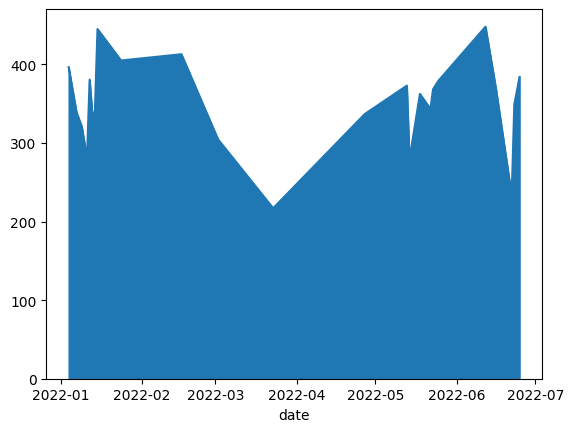

In [23]:

from datetime import datetime
df_tmp = df
df_tmp = df_tmp[(df_tmp["date"] > datetime(2022, 1, 1).date())]
df_tmp.groupby("date")[col].mean().plot.area()


In [24]:
# NON-ALPHA-NUM
# Decided to use ratio as it is more informative

col = "non_alpha_ratio"
df_tmp = show_outliers(df,col, 0.045, "higher", limit=10)
mod = lambda art : art["content"] + "\n---------------\n"
show_df_lines(df_tmp, file, mod)

  3%|▎         | 6476/201681 [00:00<00:09, 20974.03it/s]

Milwaukee o výhře rozhodlo ve druhé čtvrtině, kterou i díky sérii 20:0 vyhrálo 43:17. O poločasové přestávce domácí vedli 77:45, takže část třetí čtvrtiny a celé poslední dějství odehráli jen náhradníci.
„Dnes jsme si jasně řekli, že se jako tým musíme soustředit na každý útok,“ řekl po utkání nejlepší střelec zápasu Janis Adetokunbo. „U všech hráčů jsme potřebovali, aby byli aktivnější než v úvodním zápase. A podařilo se to skvěle,“ přidal trenér Mike Budenholzer.
Domácí ani jednou nepustili Atlantu do vedení. Nejvýraznější podíl na tom měli Adetokunbo (25 bodů, devět doskoků a šest asistencí) a Jrue Holiday (22 bodů a sedm asistencí).
Adetokunbovi a Holidayovi sekundovali Brook Lopez s 16 body a Khris Middleton s 15 body, sedmi doskočenými míči a osmi asistencemi. Bucks do zápasu nasadili všech 15 hráčů. Necelých deset minut, za které stihl dva body a dva doskoky, si na konto připsal i Janisův starší bratr Thanasis Adetokunbo.
Na druhé straně si Trae Young dva dny po životním večeru 

  7%|▋         | 14705/201681 [00:00<00:11, 15817.92it/s]

Český celek se ani ve čtvrtém utkání pod koučem Pavlem Vrbou nedočkal premiérové letošní výhry, naopak podruhé za sebou prohrál.
„Není to až tak rozhodující. Výsledky v přípravě před mistrovstvím Evropy 2012 taky byly kostrbaté a nakonec jsme prošli až do čtvrtfinále. Věříme, že v kvalifikaci náš výkon nastartujeme a otočí se to,“ nepřeceňuje výsledky přípravných utkání Petr Čech.
Po třech zápasech předešlých experimentů  trenér Vrba tentokrát poslal na trávník výběr, který se by se měl hodně blížit chystané sestavě na úterní start kvalifikace o mistrovství Evropy, kdy se Češi střetnou s Nizozemskem.
Pro některé hráče včetně hlavních opor - brankáře Čecha a záložníka Rosického - šlo zároveň o šanci obnovit herní praxi, oba zkušení hráči totiž ztratili pozici v základních jedenáctkách svých klubů.
Poprvé pod explzeňským trenérem v reprezentaci nastoupil záložník Petr Jiráček a Karel Pilař. Ve středu obrany pak dostala přednost dvojice Michal Kadlec a Václav Procházka a na hrot byl nasaz

 21%|██▏       | 42883/201681 [00:02<00:07, 21419.63it/s]

Teplotu nad 25 stupňů, která je hranicí letního dne, v pondělí zaznamenaly tři stanice. Vedle Vyššího Brodu a Pohoří to byl ještě Vimperk, kde meteorologové naměřili 25,5 stupně.
„I v nejvyšší poloze na Šumavě, v Jezerním slati, bylo 23 stupňů Celsia,“ doplnil pro českobudějovický Český rozhlas meteorolog Jaroslav Hintermüller.
Teplotní rekordy pro 21. říjen v pondělí padly na zhruba třech čtvrtinách stanic, které měří alespoň 30 let. Takových má ČHMÚ v celém Česku 152.
Tabulky rekordů se budou po dnešku přepisovat i na šesti z 11 stanic, které měří 100 let a více. Na stanici v Opavě-Oticích, která měří 140 let, se v pondělí teplota vyšplhala na 23,9 stupně, čímž byl o 2,7 stupně překonán dosavadní rekord z roku 1943.
Stanice v Přerově, která měří 136 let, v pondělí zaznamenala maximum 22 stupňů, čímž by překonán rekord z roku 2013.
---------------



 23%|██▎       | 47313/201681 [00:02<00:07, 21550.03it/s]

Iveta Benešová ani ve čtvrtém vzájemném kání nedokázala na Bělorusku Azarenkovou najít recept a prohrála. Rodačka z Mostu hrající levou rukou dokázala soupeřce vzdorovat až ve druhém setu za stavu 2:6, 1:6 a 0:40, kdy odvrátila postupně šest mečbolů.
Nakonec Benešová před zraky svého přítele a rakouského tenisty Jürgena Melzera podlehla favorizované Bělorusce za sedmasedmdesát minut 2:6 a 2:6, ale i tak měla česká hráčka důvod k radosti.
„Výsledek je drsný. Hrála zase výborně. Je třetí na světě, tak něco umět musí. Samozřejmě bezprostředně po zápase bych si přála, aby to bylo jinak, nebo alespoň více vyrovnané. Je ale na čem stavět, tak doufám, že budu v podobných výkonech pokračovat,“ říká Benešová a dodává, že vyrovnání loňského grandslamového maxima je pro Benešovou na začátku roku povzbuzením do nové sezony.
„Doufám, že to tak bude, ale pořád se musí pracovat a být soustředěný i na další turnaje. Neberu to tak, že by to mělo přijít automaticky, protože všichni na sobě také pořád pr

 29%|██▉       | 58491/201681 [00:03<00:06, 21994.14it/s]

„Jídlo je návyk, lidé jsou zvyklí, musíme si uvědomit, že u nás 50 let gastronomie dostávala na zadek. Ale mám pocit, že posledních pět roků to nabralo švunk, jídlu se dostává více pozornosti,“ říká s tím, že lidé se také naučili přijímat i zahraniční vlivy.
Nejvíce podle něj letí burgery, přibývají asijské vlivy. K Japonsku patří minimalismus, přesnost provedení, k Thajsku zase čerstvé suroviny a rychlé úpravy.
„Důležité je, aby byla pestrost,“ připomíná.
Po deseti letech se Pohlreich rozhodl, že už nebude jezdit po České republice a natáčet pořad Ano, šéfe! Přiznává, že jednoduché rozhodnutí to nebylo, protože s oblíbeným pořadem strávil kus života.
„V této zemi žije strašná spousta chytrých a šikovných lidí, to, že jsme točili pořad o těch, kterým to zrovna nešlo, je jiná věc. Nechci nikoho soudit, ale žijeme tady super,“ říká.
A proč je smažený sýr s hranolky považován stále za národní jídlo? „Lidem to chutná,“ říká, a hned s úsměvem dodává, že zrovna on smažák v oblibě nemá.
„Nejr

 46%|████▌     | 92387/201681 [00:04<00:05, 21134.71it/s]

James byl nejlepším střelcem zápasu s 28 body, k tomu přidal 12 doskoků a osm asistencí. Znovu tak přiblížil Lakers k první trofeji po deseti letech. Klíčovou tříbodovou střelu proměnil Anthony Davis 40 sekund před koncem, Miami už poté devítibodovou ztrátu nedohnalo.
„Byla to strašně důležitá akce a rozhodující moment utkání,“ řekl James. „Ve čtvrté části se obvykle rozhoduje o vítězi. Máte 12 minut na to ubránit svůj náskok. V útoku jsme hráli to, co jsme chtěli. Velmi dobře jsme volili akce a střely. Je to o nastavení mysli. Naše práce je soupeře přestřílet nebo mu nedovolit dát víc bodů, než dáme my, což je v podstatě to samé. Takhle to máme v týmu nastavené, jak je rok dlouhý,“ dodal James, který odehrál 53. zápas ve finále a posunul se v historické tabulce na páté místo.
Během utkání se týmy desetkrát vystřídaly ve vedení. Za tři čtvrtiny měli nejvyšší náskok Lakers, kteří vedli o sedm bodů. Miami dokázalo odskočit maximálně na pět bodů. O vítězi se tak rozhodovalo až v závěru.
T

 53%|█████▎    | 107524/201681 [00:05<00:04, 21056.09it/s]

Nad střední Evropou se bude udržovat nevýrazná oblast vyššího tlaku vzduchu.
V noci bude jasno nebo skoro jasno. Nejnižší teploty 17 až 13 stupňů Celsia. Slabý proměnlivý vítr do 10 km/h nebo klidno.
Přes den by mělo být skoro jasno až polojasno, v západních Čechách postupně oblačno a místy přeháňky nebo bouřky. Nejvyšší teploty 27 až 31 stupňů, v 1000 m na horách kolem 23 stupňů Celsia. Slabý proměnlivý vítr do 15 km/h.
Tlak se měnit nebude. Doba prvního pobytu na přímém slunci mezi 11. a 14. hodinou, po jejímž uplynutí pokožka fotocitlivých osob (fototyp I a II) začne rudnout nebo pigmentovat, je 20-25 minut.
Na našem území bylo dnes naměřeno  307 Dobsonových jednotek ozónu, tedy 8 % pod normálem, což je podprůměrný stav.
---------------



 67%|██████▋   | 134492/201681 [00:06<00:03, 21789.76it/s]

Argentina vyhrála velký turnaj poprvé od roku 1993. Mistrovství Jižní Ameriky opanovali dvojnásobní světoví šampioni popatnácté v historii a vyrovnali se doposud nejúspěšnějšímu týmu Uruguayi.
Hvězdný argentinský kapitán Lionel Messi získal ve 34 letech první velkou trofej s národním celkem, dosud s reprezentací ovládl jen olympijský turnaj v roce 2008. Brazílie nedokázala obhájit předloňské prvenství a na jubilejní desátý jihoamerický titul nedosáhla.
„Bylo to strašně těžké mistrovství. Vyhrát nad Brazílií je vždy výjimečné. Je to skvělý titul a doufám, že si ho všichni Argentinci užijí,“ citoval twitterový účet argentinské reprezentace trenéra Lionela Scaloniho, jehož tým protáhl sérii bez porážky na 20 utkání. Naposledy prohrál předloni v semifinále Copy América s Brazílií.
Souboj tradičních rivalů byl od začátku velmi tvrdý a nabídl jen minimum gólových šancí. Hned z té první otevřeli Argentinci ve 22. minutě skóre. Dlouhý pas od Rodriga De Paula prošel přes obránce až k nabíhající

 72%|███████▏  | 145236/201681 [00:07<00:02, 20193.92it/s]

„Byly celé pod vodou, ale vydržely to. Sebraly se, ostříhal jsem je, obrazilo to. Všechno je to v pořádku,“ mluví o rajčatech 63letý Pavel Choc z Kozárovic, který měl ještě v červnu půl metru vody v domě a zahradu zatopenou.
„Letos jsem si nechal jenom řádek jahod, dvakrát týdně máme se synem koktejl. My jsme na koktejly, takže dám mléko do mrazáku a dáme si koktejlek. Ono se to po té vodě pomalu srovnává, ale musíte se snažit. Když se nebudete snažit, je konec,“ říká Choc, který v čistém a moderně vybaveném domě žije se svým synem. Manželka mu zemřela po povodních v roce 2002.
Dnes už by nikdo nepoznal, že tu nějaká povodeň byla.
„Díky tomu, že jsme tady byli, tak hned jak voda opadla, vymetli jsme a vytřeli. Já měl v bytě přesně 2,5 metru vody. Pak už to pokleslo, i když venku se nedalo chodit, ale v bytě nebyla a už se vysoušelo. V první řadě jsme vysoušeli nábytek, aby se to nerozklížilo úplně. I když do ložnice jsme museli dát šrouby a velké podložky, stáhnout to, protože se nábyt

100%|██████████| 201681/201681 [00:09<00:00, 20538.98it/s]


In [25]:
df_tmp = show_outliers(df,col, 0.012, "lower", limit=10)
show_df_lines(df_tmp, file, mod)

 13%|█▎        | 26574/201681 [00:01<00:08, 21241.64it/s]

Český ministr zemědělství Jakub Šebesta na schůzce se svými resortními kolegy v Bruselu odmítl zvýšení dotace pro zemědělce přímo ze státních rozpočtů jednotlivých zemí. Jinou formu podpory ale podle něj Česko podporuje.
Podle Šebesty by si totiž Česko nemohlo navýšení státní pomoci producentům mléka dovolit. Naši výrobci mléka by pak byli poškozeni vzhledem ke svým konkurentům z jiných členských zemí.
Předseda Svazu chovatelů českého strakatého skotu Roman Šustáček potvrdil, že současný návrh evropské podpory výrobců mléka je především výsledkem tlaku mlékařských lobby ze silných evropských zemí.
Ministr Šebesta ještě zdůraznil, že jednotliví ministři silně tlačí na Evropskou komisi, aby jako nadnárodní orgán přišla s další formou podpory pro farmáře na starém kontinentu.
Česko například podporuje zvýšení propagace mléčných výrobků, aby o ně byl mezi spotřebiteli větší zájem. Unie by podle Prahy měla také přispět zemědělcům na to, aby se sdružili do různých výrobních družstev a měli t

 17%|█▋        | 35093/201681 [00:01<00:07, 20955.81it/s]

Jak z Mnichova poznamenává naše zpravodajka Zita Senková, v Zemanově doprovodu jsou ministr průmyslu a obchodu Miroslav Grégr a ministr pro místní rozvoj Petr Lachnit.
---------------



 45%|████▌     | 91645/201681 [00:04<00:05, 21472.79it/s]

Dnes byl zveřejněn takzvaný index ekologické snášenlivosti, který má umožnit posuzování vlivu hospodářských aktivit na životní prostředí každé jednotlivé země. Africké státy pak předložily svou představu o cestě z vlastní chudoby a nechyběly ani ekonomické a politologické analýzy světového vývoje. Jednání budou pokračovat do úterka.
---------------



 59%|█████▉    | 118634/201681 [00:05<00:03, 22802.40it/s]

Evropští pozorovatelé v Gruzii zůstanou nejméně do září příštího roku. Jsou jedinou mezinárodní misí na Kavkaze, protože Moskva odmítla prodloužit mandát pozorovatelů z OSN a Organizace pro bezpečnost a spolupráci v Evropě.
Mise Unie se ale nedostane do separatistických regionů Jižní Osetie a Abcházie. Ty jsou podle mezinárodního práva součástí Gruzie, ale po loňské válce vyhlásily nezávislost.
Rusko na mezinárodní scéně vystupuje jako protektor obou oblastí a evropské pozorovatele do nich odmítá vpustit; i přesto, že s tím po loňské válce souhlasilo.
Čtěte také:
Jižní Osetie propustila dva zadržované pozorovatele OBSE
Kreml uznal nezávislost Jižní Osetie a Abcházie
Ruský parlament vyzval prezidenta k uznání Abcházie a Jižní Osetie
Kreml podporuje nezávislost Abcházie a Jižní Osetie
Jižní Osetie se vyslovila pro nezávislost
---------------

Na mši v Bostonu se sešli nejenom příbuzní a přátelé Edwarda Kennedyho, ale i mnoho významných osobností včetně prezidenta Baracka Obamy.
Rrakev s 

 74%|███████▎  | 148241/201681 [00:06<00:02, 22106.49it/s]

Abú Hamzu zatkla policie ve městě Zenica, kde si také odpykával trest odnětí svobody. Policie jej dopadla po intenzivním pátrání jen krátce poté, co na něj Interpol vydal zatykač.
Vlastním jménem Karaj Kamel Bin Alí udržoval kontakty s terostistickými organizacemi ve světě. V Bosně i v sousedním Srbsku vyvolala jeho týdenní dovolená z vězeňského trestu četné otazníky,  protože je považován za hrozbu pro národní bezečnost Bosny a Hercegoviny.
Přečtěte si také:
Srbský politik Vojislav Šešelj opět stane před tribunálem v Haagu
Bosna musí zrychlit přijímání zákonů nutných k evropské integraci
Bosna bude mít nového Vysokého představitele mezinárodního společenství
---------------



 77%|███████▋  | 154929/201681 [00:07<00:02, 21985.84it/s]

Postup sociální demokracie je v souladu s Ústavou uvedl Traian Basescu. Ocenil vysokou volební účast Rumunů, která je podle něj vyjádřením důvěry v demokracii a v demokratické instituce. Podle Traiana Basesca skončilo období boje a nastal čas pro usmíření a vyvedení země z krize.
Dosavadní prezident Basescu zvítězil v boji o post hlavy státu s rozdílem necelého procenta. Sociálně demokratická strana jeho rivala Mirceay Geoany  žádá od Ústavního soudu anulování druhého kola voleb a jeho opakování.
---------------



 84%|████████▎ | 168566/201681 [00:07<00:01, 22626.18it/s]

Viditelně rozhořčený Abbás shrnul násilné převzetí moci v Gaze jednotkami Hamasu z minulého týdne jako puč a příchod temna namísto budování palestinské státnosti. Islamisté si podle něj chtějí v pásmu Gazy zřídit soukromý stát, a to za pomoci vraždění a násilí na politických odpůrcích, přičemž terčem pumového atentátu se prý měl před několika týdny stát i on sám.
Činitelé Hamasu projev vyhodnotili jako nedůstojný prezidentského úřadu. Abbásův proslov je každopádně vnímán jako jasná a sebevědomá odpověď islamistům, kteří sice před týdnem zdecimovali prezidentovy jednotky, avšak od té doby ho opakovaně vyzývají k jednání a k vytvoření nového kolektivního vedení.
---------------

Německý spolkový kancléř Gerhard Schröder má před sebou sérii setkání s politiky sousedních zemí. V přístavním městě Štětín na severozápadě Polska se dnes sejde s tamním premiérem Jerzym Buzkem a prezidentem Alexandrem Kwasniewskim. Podle varšavského zpravodaje Českého rozhlasu Pavla Nováka bude předmětem jejich 

 96%|█████████▌| 193503/201681 [00:09<00:00, 22122.45it/s]

Ještě ráno se prezident Peres pokoušel dotlačit dvě nejsilnější strany k vytvoření vlády národní jednoty. Netanjahu se ale odmítl vzdát vyhlídky na premiérské křeslo. Livniová prý zase nechce hrát v budoucím kabinetu druhořadou roli a prohlásila, že raději půjde do opozice.
Netanjahu tvrdí, že Kadimu do vlády znovu pozve. Nejspíš ale bude muset sázet hlavně na krajně pravicové a náboženské strany. Takový kabinet bude mít patrně velmi rezervovaný přístup k jakýmkoli mírových rozhovorům s arabskými vládami.
K tématu si můžete také přečíst:
Palestinský prezident vyzývá k mezinárodní izolaci pravicové vlády v Izraeli 
Nejsilnější strany v Izraeli se přetahují o přízeň radikála Liebermana 
Izraelské volby vyhrála Cipi Livniová
Izraelské volby nejspíš vyhrála dosavadní vládní strana Kadima
Volební účast v Izraeli je vysoká navzdory špatnému počasí 
Netanjahu: Pokud vyhrajeme volby, svrhneme v Gaze vládu Hamásu
---------------



100%|██████████| 201681/201681 [00:09<00:00, 21456.04it/s]


In [26]:
# strange max


table = df.pivot_table(index="date", values="non_alpha_ratio", aggfunc="mean")


df_tmp = df[df["date"] == table.idxmax().values[0]]
show_df_lines(df_tmp, file, mod)





100%|██████████| 201681/201681 [00:09<00:00, 21568.82it/s]

Ani bod naopak zatím nezískali hráči Kladna, Plzně, Pardubic a Třince. Třinečtí dnes dokonce utrpěli debakl 1:8 od Litvínova.
Výsledky - 4. kolo:
Vítkovice - Pardubice 5:2 (1:1, 1:0, 3:1), Znojmo - Karlovy Vary 4:2 (2:1, 1:0, 1:1), Kladno - Vsetín 1:3 (1:0, 0:1, 0:2), Slavia Praha - Sparta Praha 4:1 (2:1, 1:0, 1:0), Zlín - Plzeň 2:1 (1:0, 0:0, 1:1), Litvínov - Třinec 8:1 (3:1, 1:0, 4:0), Liberec - Jihlava 5:1 (1:0, 3:0, 1:1).
---------------



In [27]:
# num words per line
col = "num_words_per_line"
df_tmp = show_outliers(df,col, 40, "higher", limit=10)
mod = lambda art : art["content"] + "\n---------------\n"
show_df_lines(df_tmp, file, mod)

 15%|█▍        | 29571/201681 [00:01<00:07, 22555.69it/s]

V pondělí 22. března odstartovala z kosmodromu Bajkonur v Kazachstánu raketa Sojuz-2.1a., která vynesla na oběžnou dráhu celkem 38 satelitů. Jedním z nich byla i malá družice ve tvaru krychle o rozměrech 10 x 10 x 11 centimetrů a hmotnosti zhruba 1,3 kilogramů, která teď obíhá kolem Země po polární dráze ve výšce zhruba 550 kilometrů.
Za misí CubeSatu GRBAlpha stojí firmy i vědci z Česka, Slovenska, Maďarska a Japonska. Po půl roce na orbitu je jasné, že tato malá kostka umí velké věci. Dokáže totiž detekovat záření provázející zhroucení velmi hmotných rotujících hvězd či srážky neutronových hvězd v podobě gama záblesků, což byla dosud doména velkých satelitů.
„První gama záblesk jsme detekovali 7. srpna. Další následoval o dva týdny později a minulý týden se nám podařilo detekovat třetí,“ popisuje astrofyzik Norbert Werner, který působí v Ústavu teoretické fyziky a astrofyziky Přírodovědecké fakulty Masarykovy univerzity, jejíž badatelé jsou zodpovědní za vyhodnocení vědeckých dat z d

 24%|██▍       | 48327/201681 [00:02<00:08, 18738.39it/s]

Cigarety HEETS se kouří přes speciální zařízení IQOS. V něm se tabák pouze zahřívá, ale nedochází v něm k hoření, a tak má být podle společnosti méně zdravotně závadný. Společnost Philip Morris výrobek uvedla na trh 1. července roku 2017. A ministerstvo financí řeklo, že výrobek nepodléhá spotřební dani, protože chybí legislativa.
Z výročních zpráv společnosti Philip Morris vyplývá, že v roce 2017 se vykouřilo 72 milionů kusů cigaret HEETS. V loňském roce to bylo už 532 milionů kusů. Státu tak teoreticky na spotřební dani unikly téměř čtyři stovky milionů korun. Zahřívaný tabák se totiž daní až od konce března tohoto roku.
Analýza nebo nějaké jiné odborné posouzení, ve kterém by bylo výslovně napsáno, že česká legislativa zdanění neumožňuje, ale neexistuje.
‚Subjekt nedisponuje žádnou analýzou‘
Resort financí tvrdí, že takové posouzení udělala celní správa. „Vzhledem k tomu, že se v případě zahřívaných tabákových výrobků jednalo o zcela nové výrobky, které nebyly dostupné na trhu, došl

 29%|██▉       | 59094/201681 [00:02<00:07, 18779.43it/s]

Základní ingredience pro vzestup populismu lze najít i v Kanadě: bělošská etnická většina ztrácí demografickou nadvládu, náhlý příliv imigrantů mění strukturu komunit a kulturní zvyklosti. Objevují se média a politické osobnosti, které staví svůj program na nenávistných náladách. Politická situace v zemi přesto zůstává stabilní, centristické liberální zřízení země se těší podpoře veřejnosti. Politika založená na reakci většiny neprorazila, přistěhovalectví a rozmanitost etnického složení obyvatelstva jsou v Kanadě zdrojem národní hrdosti.
Nelze však říct, že by kanadská společnost byla sama o sobě liberálnější než jiné západní společnosti. Současný stav je výsledkem dlouhodobého politického snažení. Série strategických rozhodnutí a podnětů ze strany státních institucí, existence silných menšinových koalic a geografická poloha zemi napomohly nepodlehnout vlně populismu, míní Taubová.
Většina proti menšině, my versus oni
V jiných západních zemích se pravicový populismus projevuje prosazo

 37%|███▋      | 74677/201681 [00:03<00:06, 20485.73it/s]

Komplex kanceláří, apartmánů a hotelu Watergate se nachází zhruba 20 minut chůze od Bílého domu a jen o kousek dál od Trumpova hotelu. Je to lehká procházka ulicemi Washingtonu s hezkým závěrem u řeky Potomac.
Není známo, zda tam Donald Trump někdy byl, a těžko mu to mít za zlé. Na samotných budovách není mnoho zajímavého a v sobotu ráno 17. června 1972 se tam nechtělo ani Bobu Woodwardovi.
Devětadvacetiletý novinář deníku Washington Post tehdy dostal telefonát o vloupání se do místní kanceláře Demokratické strany a tak nějak doufal, že podobné novinářské "obíhačky" má už za sebou.
Záhy se ukázalo, že tak úplně obyčejná "obíhačka" to není a Woodward spolu s kolegou Carlem Bernsteinem následnou aférou Watergate změnili svou kariéru, dějiny svého deníku i celé země.
Ve stručnosti lze Watergate shrnout následovně: u pětice lupičů, kteří se v roce 1972 vloupali do kanceláře Demokratické strany, se velice rychle ukázalo propojení na republikánský Výbor pro znovuzvolení prezidenta Richarda N

 45%|████▍     | 90205/201681 [00:04<00:05, 21141.02it/s]

„Ministerstvo průmyslu a obchodu zadalo expertní posudek na způsobilost projektu, na základě kterého se vyhodnotí, zda je z hlediska inovativnosti způsobilý a jestli nedošlo k pochybení,“ uvedl pro server iROZHLAS.cz Marek Vošahlík z tiskového odboru resortu.
Až poté se ministerstvo rozhodne, zda bude dotaci ve výši 100 milionů vymáhat od holdingu Agrofert spadajícího do svěřenského fondu premiéra Andreje Babiše (ANO) zpět. „V případě, že by byl případ uzavřen v neprospěch příjemce, bude řídicí orgán požadovat vrácení prostředků v souladu se zákonem,“ doplnil Vošahlík.
Závěr Evropské komise přitom zněl jasně: projekt linky na výrobu toastového chleba nebyl inovativní a na unijní dotaci neměl nárok. „Je to pouze kvalitativní úprava produktu, který žadatel – a stejně tak i jeho konkurenti – už vyráběl,“ napsali unijní kontroloři, kteří požadovali projekt stornovat.
Ve svých závěrech se Brusel opřel o hodnocení trojice expertů, které oslovil po námitkách české strany. A k čemu došli? Proj

 49%|████▉     | 98716/201681 [00:04<00:05, 19934.80it/s]

Loni totiž CEFC získala desetinu ve skupině J&T, nedávno pak MF DNES přinesla informaci, že by v ní měla svůj podíl navýšit na polovinu, a to za investici ve výši zhruba jedné miliardy eur.
V případě Penty jsou nyní jednání s CEFC podle důvěryhodných zdrojů teprve na začátku. Ve hře je však údajně nabídka, že by CEFC investovala několik miliard eur do kapitálu skupiny a za to by získala 50 procent jejích akcií.
Své podíly by si tak na polovinu pokrátili všichni stávající vlastníci Penty, což je pět mužů. Největší podíly, celkem přes 80 procent, mají zakladatelé skupiny Marek Dospiva a Jaroslav Haščák, o zbylý podíl se dělí Jozef Oravkin, Eduard Maták a Iain Child.
Obě strany podepsaly dokumenty o mlčenlivosti a tak nějaké oficiální informace v tuto chvíli nelze získat. Penta informace nechtěla komentovat.
„Rozumíme tomu, že informace o čínských investicích jsou nyní trendy. Penta se ale zásadně vyjadřuje jen k uzavřeným obchodům, žádné spekulace nekomentujeme,“ řekl Radiožurnálu mluvčí

 61%|██████    | 122173/201681 [00:06<00:03, 20676.89it/s]

Statici určili po bouřích na Břeclavsku a Hodonínsku ke zbourání zatím přes 60 domů. Novinářům to po jednání krajského krizového štábu řekl ředitel jihomoravských hasičů Jiří Pelikán. Demolice poničených domů ale v sobotu nezačala, je potřeba nejprve jednat s pojišťovnami. „Je možné, že nebude ani v neděli,“ řekla ČTK mluvčí Jihomoravského kraje Alena Knotková.
Podle ředitele jihomoravské policie není v souvislosti s bouří nikdo pohřešovaný. Zatím je potvrzeno pět obětí. Minimálně 150 lidí je zraněných. Dva těžce zranění lidé, které převzaly do péče nemocnice ve Vídni, jsou mimo ohrožení života.
Druhá noc po tornádu
V Lužicích během noci z pátku na sobotu pršelo, naštěstí to ale byl jenom lehký déšť, který neškodil. Modrá plachta zakrývala většinu střech, které ještě půjdou opravit. Před domy se v zasažené oblasti navršily haldy odpadu - ten zaplnil prakticky celé velké hřiště u sokolovny, kde sídlí krizový štáb. Ulice byly skoro bez lidí, pohybovali se po nich jenom hasiči a policisté

 76%|███████▌  | 153128/201681 [00:07<00:02, 21721.74it/s]

Pod slovem klimatizace si asi mnozí vybaví hučící jednotku na stěně pokoje, která dělá za horkého léta pobyt v místnosti snesitelnější a s ní spojenou druhou o něco hlučnější jednotku venku na zdi. Ale z pohledu konstruktérů a vývojářů jde o daleko širší téma.
„Klimatizace, tak jak jí chápeme my, není jenom chlazení. Zajišťuje i ohřev vzduchu, vlhčení vzduchu v zimě, případně odvlhčování, úprava čistoty ovzduší, pro kterou využíváme různé stupně filtrace. Komfortní klimatizace zajišťuje i větrání,“ vysvětluje vedoucí ústavu techniky prostředí Fakulty strojní ČVUT Vladimír Zmrhal s tím, že vždy jde o úpravu vzduchu s využitím různých druhů energií a technologií.
„Základem klimatizačního zařízení je zdroj chladu. Jde o venkovní kondenzační jednotku a vnitřní jednotku, která obsahuje výparník. To je to nejčastější řešení. Jde o takzvaný kompresorový chladivový okruh. Kompresor pohání chladivo a ve výměnících dochází k předávání a odnímání tepla. Je to vlastně stejný princip, na jakém prac

100%|██████████| 201681/201681 [00:09<00:00, 20188.78it/s]


In [28]:

# num words per line
df_tmp = show_outliers(df,col, 10, "lower", limit=10)
mod = lambda art : art["content"] + "\n---------------\n"
show_df_lines(df_tmp, file, mod)

 10%|█         | 20564/201681 [00:00<00:08, 21438.97it/s]

Deník Le Figaro uveřejnil informace, podle nichž  jsou útoky
na policisty v rámci organizovaných gangů bodované. Za zapálení
policejního vozu je  padesát bodů, za zranění policistů sto
bodů a podobně. Od začátku roku bylo zraněno na dva a půl
tisíce policistů, což  je přičítáno zejména rostoucí brutalitě
band, které tvoří převážně děti přistěhovalců z
problematických částí měst.
Mladíci považují  čtvrtě, kde žijí, za své, a když vidí policejní uniformu, útočí,  tvrdí
policejní zpráva. K rostoucí agresivitě násilných band
přispívá i to, že jen málokdy jsou viníci dopadeni a z obav
před dalšími násilnostmi je soud raději osvobodí.
---------------



 28%|██▊       | 55582/201681 [00:02<00:06, 22949.11it/s]

Počasí u nás bude ovlivňovat výběžek tlakové výše zasahující z Atlantiku  
nad Ukrajinu. Jih a jihovýchod území bude částečně ovlivňovat mělká  
brázda nízkého tlaku vzduchu nad Balkánem.
Bude skoro jasno, na jihovýchodě až polojasno. Nejvyšší denní teploty 14 až  
18,  v 1000 m na horách kolem 10 °C.  Čerstvý severovýchodní až  
východní vítr 15 až 30 km/h, na Moravě a ve Slezsku v nárazech  50 až 70 km/h.
Tlak se měnit nebude.
Erupční aktivita Slunce je slabá, pulzační aktivita geomagnetického pole 
je nízká.
---------------



 41%|████      | 81920/201681 [00:03<00:05, 23265.39it/s]

Podle médií se původně prezident Chirac, který návrh zákona
považuje za zbytečný,  telefonicky omluvil tureckému
premiérovi Erdoganovi s tím, že udělá všechno pro to, aby
návrh zákona schválen nebyl. Elysejský palác však něco
takového dementoval a potvrdil, že Chirac sice považuje
návrh zákona za zbytečný, ale zároveň trvá na tom, že pokud
chce Turecko vážně uvažovat o vstupu do Evropské Unie, musí
genocidu Arménů uznat.
Předpokládá se, že Chirac bude něco takového opakovat i dnes během schůzky s arménským premiérem Andranikem Markarianem, na druhou stranu mu těžko slíbí
přijetí zmíněného zákona, podle některých odborníků nelze
jeho projednávání v senátu čekat do prezidentských voleb v
květnu 2007.
---------------



 51%|█████     | 103349/201681 [00:04<00:04, 23335.93it/s]

Odpoledne nás podle předpovědi čeká příjemné jarní počasí. Má být jasno s teplotami do 20 stupňů.
Rozsáhlá oblast vysokého tlaku vzduchu nad střední Evropou a  Pobaltím, která
ovlivňuje počasí u nás, zvolna slábne a bude se přesouvat k  severovýchodu.
Odpoledne bude jasno nebo skoro jasno.
Nejvyšší teploty 16 až 20, v 1000 metrech na horách kolem 13 stupňů.
Mírný východní až jihovýchodní vítr 5 až 20 km/h.
Tlak mírně klesne.
BIO předpověď:  Stupeň č. 1 - mírná zátěž
Erupční aktivita Slunce je velmi slabá.
---------------



 60%|██████    | 121628/201681 [00:05<00:04, 18968.48it/s]

Tchaiwanský snímek amerického režiséra Enga Leeho Tygr a Drak rozdělil kategorii cizojazyčných filmů na dvě skupiny. Tygr a Drak natočený v čínštině získal deset nominací a velké šance má i na Oskara za nejlepší snímek. Kromě českého filmu Musíme si pomáhat soutěží o Oskara i belgický Everybody Famous, mexický Amores Peros a francouzský snímek v Jeho režisérka Agnes Českému rozhlasu 1 - Radiožurnálu řekla, že je smutná z toho, že jsou kolonizováni Amerikou. Zahraniční režiséři poukazují na to, že film Tygr a Drak byť natočený v čínštině, je filmem amerického režiséra pro americké publikum. Na druhou stranu doufají, že jeho popularita prolomí bariéry amerického odporu vůči titulkovaným filmům.
V kategorii zahraničních filmů má šanci na zisk prestižní zlaté sošky také český film Musíme si pomáhat. Jeho režisér Jan Hřebejk by před nadcházejícím slavnostním ceremoniálem byl nejraději, kdyby se už žádné ceny nerozdělovali a zůstalo pouze u nominací. I kdyby žádnou cenu nedostal, cítí se být

 70%|███████   | 141694/201681 [00:06<00:02, 21555.77it/s]

V silném západním proudění k nám proniká z Atlantického oceánu vlhký vzduch.
Bude oblačno až zataženo, na většině území občasný déšť nebo přeháňky. Nejvyšší  
teploty 15 až 19, v 1000 metrech na horách kolem 12 °C. Mírný severozápadní až  
západní vítr 10 až 25 km/h.
Tlak slabě poklesne.
BIO: stupeň č. 1 - mírná zátěž
---------------



 79%|███████▉  | 160233/201681 [00:07<00:01, 22309.38it/s]

Kolem rozsáhlé tlakové výše se středem nad Rumunskem k nám proudí teplý  
vzduch od jihu.
Skoro jasno. Nejvyšší teploty 24 až 28, v 1000 m na horách kolem 20  
stupňů. Čerstvý jihovýchodní až jižní vítr 15-30 km/, místy, zejména ve  
vyšších polohách, s nárazy kolem 50 km/h.
Tlak se měnit nebude.
Biopředpověď: 1 - mírná zátěž. Stupeň zátěže umožňuje běžný denní režim bez omezení, pouze s přihlédnutím k aktuálnímu zdravotnímu stavu.
Erupční aktivita Slunce je slabá, pulzační aktivita geomagnetického pole
nízká.
---------------

Podle trenéra Slavie Miroslava Beránka by bylo zcela jedno, kterého soupeře by jeho tým dostal: "S Istanbulem se budeme muset vyrovnat stejně jako s jakýmkoliv jiným protivníkem. Zatím začneme alespoň shromažďovat informace." I výhoda domácího prostředí by mohla hrát příznivou roli, i když jak přiznává těžko říct: "Třikrát jsme začínali venku a třikrát jsme vyhráli."
Dvojice pro osmifinále (20. a 27. února):
Slavia Praha - Besiktas Istanbul
Hertha Berlín - Boavis

 91%|█████████ | 183279/201681 [00:08<00:00, 22807.94it/s]

Za frontálním systémem k nám proudí chladný a vlhký vzduch od  
severozápadu.
Proměnlivá, převážně velká oblačnost, místy, zejména na horách, přeháňky, na  
jihu a východě zpočátku zataženo s deštěm se sněhem. Od poloh nad 500 m  
srážky sněhové. Nejvyšší teploty 1 až 5, v 1000 m na horách kolem -2  
stupně. Čerstvý západní až severozápadní vítr 15-30 km/h, místy s nárazy kolem  
50 km/h.
UPOZORNĚNÍ: Od poloh nad 600 m se budou tvořit místy sněhové jazyky, na  
horách i závěje.
Tlaková tendence: setrvalý stav nebo slabý vzestup. Rozptylové podmínky: dobré.
Biopředpověď: 2 - střední zátěž
Aktivita Slunce na velmi slabé az slabé úrovni. Geomagnetické pole nestálé.
---------------



 95%|█████████▌| 192240/201681 [00:08<00:00, 21866.66it/s]

Situace: Počasí u nás ovlivňuje nevýrazné tlakové pole.
Bude jasno nebo skoro jasno. Při zvětšené oblačnosti zejména na  východě a
severovýchodě území ojediněle přeháňky nebo bouřky.  Nejvyšší teploty
19 až 23,   na severovýchodě kolem 17 °C,  v 1000 m na horách  kolem
14.  Mírný východní vítr 5  až  20 km/h.
Tlak se  měnit nebude.
---------------



100%|██████████| 201681/201681 [00:09<00:00, 22307.26it/s]


In [29]:
idx = df[col].sort_values(ascending=False)[0:1]
show_df_lines(idx, file, lambda x: x["url"] + repr(x["content"]) )


 82%|████████▏ | 165057/201681 [00:07<00:01, 19221.37it/s]

https://www.irozhlas.cz/sport/na-spartu-ceka-take-slavny-real-madrid-na-liberec-mallorca_200111021453_mbures'Na sparťany se při losu usmálo štěstí. Skupina je dost atraktivní, hlavně díky osminásobnému vítězi Poháru mistrů Realu Madrid a také přijatelná s vyhlídkami na postup, protože s Panathinaikosem i Portem se mohou Pražané směle měřit. Jinak viděno, ostatní skupiny jsou nabitější. V áčku se utkají Bayern Mnichov, FC Nantes, Manchester United a Boavista Porto, v béčku FC Barcelona, FC Liverpool, Galatasaray Istanbul a AS Řím a v déčku Juventus Turín, Deportivo La Coruňa, Arsenal Londýn a Bayer Leverkusen. Sparťané jsou spokojeni, což potvrdil Radiožurnálu obránce Vladimír Labant: "Většina hráčů si přála z atraktivních soupeřů buď Manchester United nebo Real Madrid, takže to vyšlo." Podle Labanta i ostatních sparťanů je skupina takzvaně hratelná. "Šance na postup není ztracena, máme naději. První bude asi Real, to se očekává, je velkým favoritem. Ale s ostatními to máme padesát na p

100%|██████████| 201681/201681 [00:09<00:00, 20866.93it/s]


array([[<AxesSubplot:title={'center':'num_words_per_line'}>]],
      dtype=object)

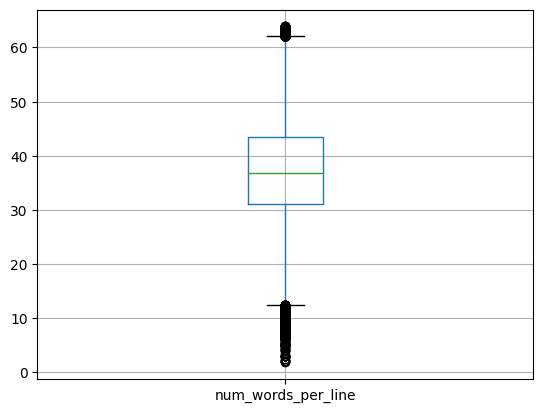

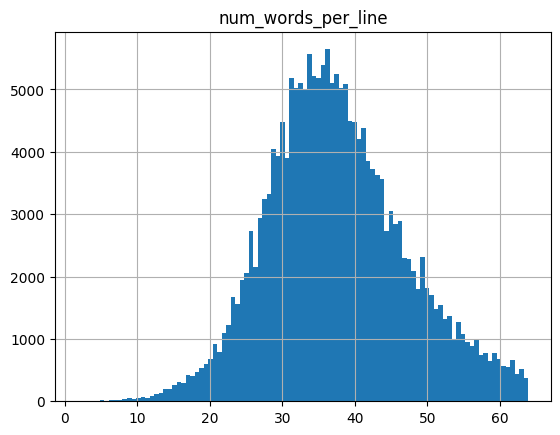

In [30]:
df_art = df[df[col] < np.quantile(df[col], 0.95)]
df_art.boxplot(column=col)
df_art.hist(column=col, bins=100)

In [31]:
# articles per day
table = df.pivot_table(index="date", values="url", aggfunc="count")


df_tmp = df[df["date"] == table.idxmax().values[0]]
df_tmp


,url,article_length,headline_length,brief_length,brief_non_alpha_ratio,num_words,num_words_ratio,num_words_per_line,avg_word_length,non_alpha,non_alpha_ratio,date
862,https://www.irozhlas.cz/zpravy-domov/rudolf-ba...,640,12,114.0,0.003125,118,0.184375,16.857143,4.559322,22,0.034375,2010-10-01
867,https://www.irozhlas.cz/zpravy-domov/tomas-jir...,694,11,223.0,0.005764,128,0.184438,18.285714,4.554688,24,0.034582,2010-10-01
876,https://www.irozhlas.cz/zpravy-domov/tomas-cze...,572,13,175.0,0.006993,106,0.185315,15.142857,4.556604,22,0.038462,2010-10-01
3156,https://www.irozhlas.cz/zpravy-svet/ozbrojenci...,563,48,212.0,0.005329,89,0.158082,44.500000,5.404494,10,0.017762,2010-10-01
4998,https://www.irozhlas.cz/zpravy-domov/jiri-zak-...,880,8,334.0,0.005682,158,0.179545,22.571429,4.683544,26,0.029545,2010-10-01
...,...,...,...,...,...,...,...,...,...,...,...,...
195267,https://www.irozhlas.cz/zpravy-domov/justina-k...,606,14,274.0,0.008251,113,0.186469,16.142857,4.504425,23,0.037954,2010-10-01
195268,https://www.irozhlas.cz/zpravy-domov/josef-zie...,675,15,206.0,0.004444,130,0.192593,18.571429,4.330769,25,0.037037,2010-10-01
198836,https://www.irozhlas.cz/zpravy-domov/petr-gawl...,869,11,275.0,0.003452,156,0.179517,22.285714,4.685897,29,0.033372,2010-10-01
198842,https://www.irozhlas.cz/zpravy-domov/petr-jank...,522,10,237.0,0.007663,100,0.191571,14.285714,4.370000,20,0.038314,2010-10-01


array([[<AxesSubplot:title={'center':'brief_non_alpha_ratio'}>]],
      dtype=object)

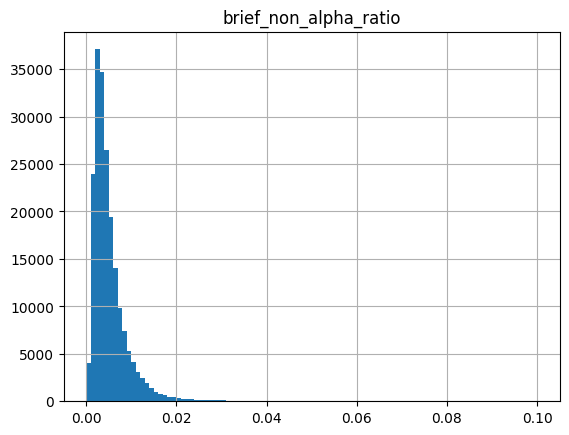

In [37]:
# NON-ALPHA-NUM
# Decided to use ratio as it is more informative

col = "brief_non_alpha_ratio"

df_art = df[df[col] <= 0.1]
df_art.hist(column=col, bins=100)


In [38]:
outliers = show_outliers(df,col, 0.015, "higher", limit=10)
show_df_lines(outliers, file, lambda x: x["url"] + ":\n" + x["brief"] + "\n---------------\n ")

  4%|▍         | 9016/201681 [00:00<00:09, 20888.98it/s]

https://www.irozhlas.cz/ekonomika/nezamestnanost-v-zari-klesla-na-8-procent-ekonomika-stagnuje_201110100922_mkaspar:
Počet lidí bez práce klesl v Česku ze srpnových 8,2 procenta na 8 procent. V září evidovaly úřady práce přes 475 tisíc nezaměstnaných, což je asi o 6400 méně než v předchozím měsíci. Klesl ale i počet volných pracovních míst. Analytici čekali, že míra nezaměstnanosti zůstane stejná.
---------------
 


  7%|▋         | 15059/201681 [00:00<00:10, 18641.25it/s]

https://www.irozhlas.cz/veda-technologie/veda/veda-brno-zaznam-reci-recova-technologie-pohlavi-jan-cernocky_2107171024_vtk:
Řeč je to, co nás odlišuje nejen od zvířat. Důležité je nejen to, co říkáme, ale i to, jakým způsobem mluvíme. Co všechno už dnes umí rozklíčovat takzvané řečové technologie? „Kdyby nás ten přístroj slyšel už dřív, tak by nás měl zaregistrované, my říkáme enrolované. Takže by dokázal ověřit, jestli se v rozhovoru skutečně objevujeme my dva, nebo jestli to je někdo jiný,“ vyzdvihuje jednu z dovedností technologií vědec Jan Černocký.
---------------
 


 15%|█▍        | 29920/201681 [00:01<00:08, 20235.18it/s]

https://www.irozhlas.cz/zpravy-svet/strelba-denver-kino-dopis-warner-bros-joker-batman-film-joaquin-phoenix-zbrane_1909250633_gak:
Pozůstalí po obětech šíleného střelce, který v roce 2012 při promítání filmu Temný rytíř povstal zabil v americkém kině 12 lidí, napsali dopis filmové společnosti Warner Bros., v němž vyjádřili obavy z nového snímku Joker. Příběh o záporné komiksové postavě, který vyvolal nadšené recenze i polemiku kvůli zobrazovanému násilí, má v USA premiéru 4. října. O dopise, který obsahuje i výzvu k boji za omezení držení zbraní v USA, informoval server BBC.
---------------
 


 20%|██        | 40434/201681 [00:02<00:08, 19731.17it/s]

https://www.irozhlas.cz/sport_fotbal/fotbaliste-levante-prekvapive-podlehli-novackovi-z-granady-1-2_201112190709_tjelinkova:
Překvapení se zrodilo v 17. kole španělské fotbalové Primera División. Levante v něm podlehlo nováčkovi z Granady 1:2. První domácí porážku v sezoně zaznamenalo Atlético Madrid, se Sevillou prohrálo 0:2.
---------------
 


 27%|██▋       | 55093/201681 [00:02<00:06, 23683.19it/s]

https://www.irozhlas.cz/zpravy-domov/otevreni-105-kilometru-dalnic-rychlost-vlada_2107050010_btk:
„Do roku 2021 zprovozníme 210 kilometrů dálnic, z toho 110 kilometrů dálnic nových a 100 kilometrů modernizované D1. Do roku 2021 rozestavíme dalších 180 km dálnic.“ To stojí v programovém prohlášení vlády premiéra Andreje Babiše (ANO).  Realita? Z větší části se to ministerstvu dopravy podařilo naplnit - silničáři v tomto volebním období zprovozní 105 kilometrů nových dálnic. Část slíbených dopravních staveb se ale vybudovat nepodařilo.
---------------
 


 32%|███▏      | 64629/201681 [00:03<00:05, 22892.45it/s]

https://www.irozhlas.cz/zpravy-domov/predpoved-pocasi-na-utery-20-brezna_200103201029_mkaclova:
Bude oblačno, během dne až polojasno, nejnižší noční teploty 0 až -4 stupně Celsia, nejvyšší denní 2 až 6 °C.
---------------
 


 34%|███▍      | 69419/201681 [00:03<00:05, 23109.82it/s]

https://www.irozhlas.cz/nepouzivat_-_veda/odbornici-pomuzou-po-internetu-lecit-lidi-kteri-jsou-zavisli-na-marihuane_201412291852_mvydrova:
Lidé, kteří mají problém s marihuanou, se můžou začít léčit po internetu. On-line poradenství dnes představili experti z organizace Sananim. Zhruba dvouměsíční terapii v rámci projektu "Skončím s hulením" povedou po chatu odborníci, kteří pomůžou klientům zvládat užívání konopí nebo mu přímo předcházet.
---------------
 


 58%|█████▊    | 117796/201681 [00:05<00:03, 25437.48it/s]

https://www.irozhlas.cz/sport/ostatni-sporty/basketbal-nybmurk-dijon-liga-mistru-vysledky_2011032003_mim:
Basketbalisté Nymburka prohráli při svém opožděném vstupu do nového ročníku Ligy mistrů v Dijonu 61:85. Nepomohlo jim ani 26 bodů nejlepšího střelce utkání Vojtěcha Hrubana. Bronzový tým uplynulého ročníku soutěže bodově táhli Alexandre Chassang (22 bodů) a Chase Simon (20).
---------------
 


 84%|████████▍ | 169389/201681 [00:07<00:01, 23513.14it/s]

https://www.irozhlas.cz/sport/tenis/simona-halepova-finale-turnaj-v-praze-wta-elise-mertensova-vysledky_2008161526_mim:
Světová dvojka Simona Halepová vyhrála turnaj WTA v Praze, který byl do kalendáře zařazen mimořádně po koronavirové pauze. Rumunská tenistka ve finále Prague Open porazila 6:2 a 7:5 Belgičanku Elise Mertensovou, jež byla třetí nasazenou.
---------------
 


 95%|█████████▌| 191981/201681 [00:08<00:00, 24521.46it/s]

https://www.irozhlas.cz/zpravy-domov/cesko-vitr-vystraha-patek_2110221424_til:
V Praze, části Středočeského a Ústeckého kraje od pátečního poledne do pozdního večera znovu silně foukat. Nárazy větru už mají být ale slabší než ve čtvrtek, během pátku mají dosáhnout 50 až 70 kilometrů za hodinu. Vyplývá to z aktuální výstrahy Českého hydrometeorologického ústavu (ČHMÚ).
---------------
 


100%|██████████| 201681/201681 [00:08<00:00, 22885.74it/s]
